# Supervised learning with SCIKIT LEARN



In [1]:
# IMPORTING ALL POSSIBLE PACKAGES

# Essential packages

from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from random import randint
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Imputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer

from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

from sklearn import datasets

from sklearn.model_selection import cross_val_score, cross_validate, cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

## exploratory data analysis
we will be working with the iris dataset



In [110]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')

iris = datasets.load_iris()

type(iris) 

#this is a BUNCH object, that combines the data, 
#target names, descriptions, feature_names, and target
#it is like a dictionary

sklearn.utils.Bunch

In [111]:
iris.keys() # It is a dictionary object

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [2]:
type(iris.data) # the data itself is a numpy array

numpy.ndarray

In [3]:
type(iris.target) # the target is the type of flower - it is an array

numpy.ndarray

In [6]:
#we have 4 columns and 150 samples
iris.data.shape

(150, 4)

In [9]:
iris.target_names #the value labels for the targets

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [10]:
X = iris.data
y = iris.target

In [7]:
df=pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [108]:
iriscolnames = iris.feature_names.copy()
iriscolnames

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [109]:
list(iriscolnames)
iriscolnames.append("species")
iriscolnames

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)',
 'species']

In [110]:
irisdf = pd.concat([pd.DataFrame(iris.data),pd.DataFrame(iris.target)], axis=1)
irisdf.columns = iriscolnames

In [145]:
irisgroup = irisdf.groupby("species")
results = {group:groupdata["sepal length (cm)"].mean() for group, groupdata in irisgroup}
results

{0: 5.005999999999999, 1: 5.936, 2: 6.587999999999998}

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F554AB6828>,
      dtype=object)

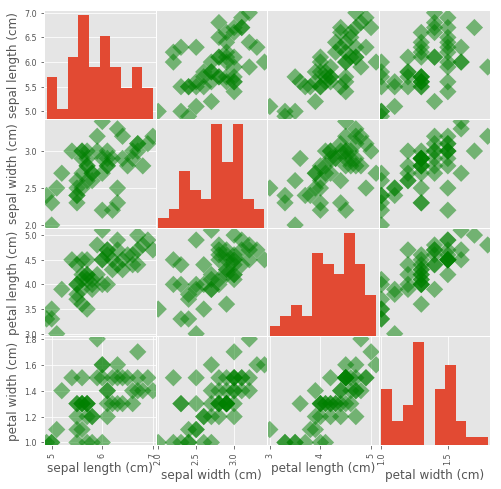

In [147]:
#visual eda

import matplotlib.pyplot as plt


pd.plotting.scatter_matrix(irisdf.loc[irisdf.species==1,'sepal length (cm)':'petal width (cm)'], 
                                alpha=0.5,figsize = [8,8], #size of figure
                               s=150, marker='D', #size of marker and shape of diamond
                              c="g")

In [148]:
parties = pd.read_csv("Datasets/Course 14 Supervised Learning/house-votes-84.csv",
                     na_values="?",
                     header = None)

colnames = ['party','infants','water','budget','physician','salvador','religious','satellite','aid','missile',
           'immigration','synfuels','education','superfund','crime','duty_free_exports','eaa_rsa']

parties.columns = colnames

parties.head()


,party,infants,water,budget,physician,salvador,religious,satellite,aid,missile,immigration,synfuels,education,superfund,crime,duty_free_exports,eaa_rsa
0,republican,n,y,n,y,y,y,n,n,n,y,NaN,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,NaN
2,democrat,NaN,y,y,NaN,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,NaN,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,NaN,y,y,y,y


In [149]:
# replace the y and n values with 1 and 0

parties = parties.replace({"n":0,"y":1})
parties.info()

parties.head() # I successfully changed the y n to 1 and 0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435 entries, 0 to 434
Data columns (total 17 columns):
party                435 non-null object
infants              423 non-null float64
water                387 non-null float64
budget               424 non-null float64
physician            424 non-null float64
salvador             420 non-null float64
religious            424 non-null float64
satellite            421 non-null float64
aid                  420 non-null float64
missile              413 non-null float64
immigration          428 non-null float64
synfuels             414 non-null float64
education            404 non-null float64
superfund            410 non-null float64
crime                418 non-null float64
duty_free_exports    407 non-null float64
eaa_rsa              331 non-null float64
dtypes: float64(16), object(1)
memory usage: 57.9+ KB


,party,infants,water,budget,physician,salvador,religious,satellite,aid,missile,immigration,synfuels,education,superfund,crime,duty_free_exports,eaa_rsa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0


In [150]:
import seaborn as sns

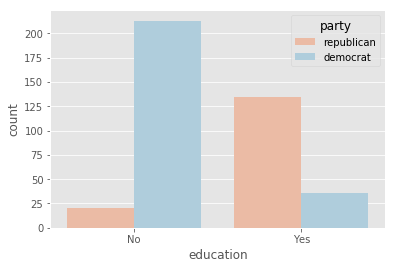

In [151]:
#VISUAL EDA
#below plots a bar plot 
#colored by the party - republican or democrat with the HUE command

plt.figure()
sns.countplot(x='education',      #the DV being COUNTED in this countplot
              hue='party',        # the factor variable - the DV will be counted separately for each factor level
              data=parties,    # data frame
              palette='RdBu')
plt.xticks([0,1], ['No', 'Yes'])
plt.show()


In [152]:
parties2 = pd.read_csv("Datasets/Course 14 Supervised Learning/house-votes-84.csv",
                     na_values="?",header=None)

# K-nearest neighbours
- Determines the group/classification of an observation based on the X number of observations nearest to it
- KNN creates a set of decision boundaries
- Where an observation lies on that decision boundary, determines the group the observation is classified into
- training a model = fitting a model to the data


In [154]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=6) #this is instantiating a KNN object

#fit the KNN to the data

knn.fit(iris['data'], iris['target']) 

#two arguments
#the features as a numpy array, and a target in an array
#this could also have been a dataframe in Pandas (or numpy array for the data)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=6, p=2,
           weights='uniform')

### Notes
- KNN requires, the features to be CONTINUOUS
- <b> Requires NO MISSING VALUES in the dataset </b>
- We will learn later on to deal with missing values and categorical variables (i.e., dummies)
- Also each row to be a unique observation - one row per observation
- Each col to be a feature
- THE TARGET column (for the iris dataset, it is the 'target' array) needs to be the same length as the features a single row

In [20]:
iris['data'].shape

(150, 4)

In [21]:
iris['target'].shape

(150,)

In [43]:
# Below is the output from instantiating the KNN object. It has all the default parameters in it.
# I can also pass this code

knn = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=6, p=2,
           weights='uniform')
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=6, p=2,
           weights='uniform')

In [155]:
# Again fit the knn to the data

knn.fit(iris['data'], iris['target']) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=6, p=2,
           weights='uniform')

In [ ]:
#NOW lets classifiy new data

prediction = knn.predict(X_new) #a numpy array of X features - the same number of features
#the shape of X_new has 3 rows, BUT IMPORTANTLY FOUR features!!

#to view the predicted valies

print('Prediction of {}'.format(prediction))

### Run a KNN on the parties data

In [156]:
parties = pd.read_csv("Datasets/Course 14 Supervised Learning/house-votes-84.csv",
                     na_values="?",
                     header = None)

colnames = ['party','infants','water','budget','physician','salvador','religious','satellite','aid','missile',
           'immigration','synfuels','education','superfund','crime','duty_free_exports','eaa_rsa']

parties.columns = colnames

parties.head()


,party,infants,water,budget,physician,salvador,religious,satellite,aid,missile,immigration,synfuels,education,superfund,crime,duty_free_exports,eaa_rsa
0,republican,n,y,n,y,y,y,n,n,n,y,NaN,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,NaN
2,democrat,NaN,y,y,NaN,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,NaN,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,NaN,y,y,y,y


In [157]:
from sklearn.neighbors import KNeighborsClassifier

# replace y and n with 1 and 0
parties = parties.replace({"n":0,"y":1})
parties.head()

# first, fill na with 0

parties = parties.fillna(0)

In [167]:
#get Iv and DV
iv = parties.iloc[:,1:]
dv = parties.iloc[:,0]

# instantiate knn
knn = KNeighborsClassifier(n_neighbors = 6)
knn.fit(iv,dv)

#results 
preds=knn.predict(iv)
propensities=knn.predict_proba(iv)

# get accuracy
knn.score(iv,dv) #94% accurate (on TRAINING data)

0.9494252873563218

In [9]:
# now extract ARRAYS for the features and the targets

import numpy as np

y = np.array(parties["party"]) #this step is not important
x = np.array(parties.loc[:,"infants":])

#or y = df['party'].values
# X = df.drop('party', axis=1).values

# Now run the knn


# 1. First fit the KNN object
knn = KNeighborsClassifier(n_neighbors = 6)

# 2. Second, fit the classifier to the data
knn.fit(x, y)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=6, p=2,
           weights='uniform')

In [12]:
# Predict the label for the trainig data

predictions = knn.predict(x)

print(predictions[0:10]) # print the first 10 predictions

print("\n")

print("the predicted party for the first observation is {}".format(predictions[0]))

['republican' 'republican' 'democrat' 'democrat' 'democrat' 'democrat'
 'republican' 'republican' 'republican' 'democrat']


the predicted party for the first observation is republican


In [20]:
# We can also get predicted probabilities
predicted_probabilities = knn.predict_proba(x)
predicted_probabilities[:,1] 
# get the second column >> predictions of being in the second category - "Republican" - comes second alphabetically

# Join the predicted probabilities with the dataframe 
parties['probabilities'] = predicted_probabilities[:,1] 
parties.head()

,party,infants,water,budget,physician,salvador,religious,satellite,aid,missile,immigration,synfuels,education,superfund,crime,duty_free_exports,eaa_rsa,probabilities
0,republican,0,1,0,1,1,1,0,0,0,1,0,1,1,1,0,1,1.000000
1,republican,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,0,1.000000
2,democrat,0,1,1,0,1,1,0,0,0,0,1,0,1,1,0,0,0.166667
3,democrat,0,1,1,0,0,1,0,0,0,0,1,0,1,0,0,1,0.000000
4,democrat,1,1,1,0,1,1,0,0,0,0,1,0,1,1,1,1,0.000000


## Measuring Model Performance

- Accuracy is commonly used 
- Number of correct predictions divided by total data points
- TPs and TNs / total number of observations
- Testing the model is done on a holdout sample


In [165]:
# let's prepare the data

X = iris['data']
y = iris['target']

# both iris data and iris target are arrays


### SPLITTING THE DATA


In [166]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=21, stratify=y)

#the default testsize is 0.25, but we set to 30%
#the stratify=y, means that we sample 30% of the samples/rows/observations from each level of the target (30% of each flower)

In [19]:
# Now we can fit the model

knn = KNeighborsClassifier(n_neighbors=8)

# fit to the train data

knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=8, p=2,
           weights='uniform')

In [21]:
# Get the array of predictions

predictions = knn.predict(X_test) # this is applied to the test features

In [22]:
# to get the measure of accuracy, use knn.score

knn.score(X_test, y_test) #Y_test is the test target, X_test is the test features. Knn is the model

0.9555555555555556

## the DIGITS DATASET

- We are dealing with a BUNCH object
- Each observation is an image of a number 
- Each variable/feature is a pixel dimension of that image - each row is a 1D array, flattened from a 2D array
- The values of each feature/column for each image (pixel) code a shade of black
- The TARGET is the number displayed in that image
- We will use the features to predict the number represented in that image based on its pixel shades (the features)
- the BUNCH object holding the data can be referenced like a dataframe


In [171]:
# Import necessary modules
from sklearn import datasets
import matplotlib.pyplot as plt


# Load the digits dataset: digits
digits = datasets.load_digits()
print(digits)
print("\n", digits.keys())

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]]), 'target': array([0, 1, 2, ..., 8, 9, 8]), 'target_names': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), 'images': array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ..., 15.,  5.,  0.],
        [ 0.,  3., 15., ..., 11.,  8.,  0.],
        ...,
        [ 0.,  4., 11., ..., 12.,  7.,  0.],
        [ 0.,  2., 14., ..., 12.,  0.,  0.],
        [ 0.,  0.,  6., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
        [ 0.,  0.,  0., ...,  9.,  0.,  0.],
        [ 0.,  0.,  3., ...,  6.,  0.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.]],

       [[ 0.,  0.,  0., ..., 12.,  0

In [30]:
# As we can see, the digits dataset is a bunch object - a dictionary, holding the "data", "targets" etc.

#the data (feature values) can be accessed using digits.data - this is the flattened array
digits.data

#The raw 2D array of the images is in the object below
digits.images

# the target
print(digits.target)

# Print the shape of the images and data keys

print(digits.images.shape) # there are 1797 observations - each an 8 x 8 matrix

print(digits.data.shape)  # there are 1797 flattened observations - 64 columns (1 row per obs)

[0 1 2 ... 8 9 8]
(1797, 8, 8)
(1797, 64)


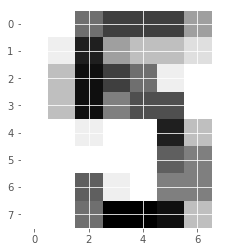

In [32]:
# Let's actually look at the image of observation 1010 - using the 2D arrays in the digits.images file
# use matplotlib

plt.imshow(digits.images[1010], cmap=plt.cm.gray_r, interpolation='nearest')

plt.show()

### RUN A KNN ON THE DIGITS DATA

In [208]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

print(digits.keys())

X = digits.data
y = digits.target

#perform split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# instantiate knn object

knn = KNeighborsClassifier(n_neighbors=7)

# fit the model

knn.fit(X_train,y_train)

# predict the values

predicted = knn.predict(X_test)

# Score the model

score = knn.score(X_test,y_test)
print(score) 

print("\n"
     + " the predicted accuracy score is",score)

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])
0.9833333333333333

 the predicted accuracy score is 0.9833333333333333


In [210]:
print(classification_report(predicted,y_test))

# note the classification report is predicting 9 different categories

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       1.00      0.95      0.97        38
           2       1.00      1.00      1.00        35
           3       1.00      1.00      1.00        37
           4       1.00      0.97      0.99        37
           5       1.00      1.00      1.00        37
           6       0.97      1.00      0.99        35
           7       1.00      0.97      0.99        37
           8       0.91      0.94      0.93        34
           9       0.94      1.00      0.97        34

   micro avg       0.98      0.98      0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360



# FITTING KNN WITH MULTIPLE VALUES FOR N_NEIGHBOURS - IRIS
* In this exercise, you will compute and plot the training and testing accuracy scores for a variety of different neighbor values. 
* By observing how the accuracy scores differ for the training and testing sets with different values of k, you will develop your intuition for overfitting and underfitting.

In [ ]:
# Create a range of numbers which will be the values of n_neighbours to model


num_neighbors = np.arange(1,10)
print(num_neighbors)

# We now will create two empty arrays, to hold the accuracy scores (knn.scores) for models fit to the TEST and TRAIN data

array_accuracy_training = np.empty(len(num_neighbors))
array_accuracy_testing = np.empty(len(num_neighbors))

# Now we can run a for loop to fit knn to each of the neighbor values, and save the scores for each model
# Note, I could have made TWO empty lists above instead of an empty array

for x in num_neighbors:
    knn = KNeighborsClassifier(n_neighbors=x)
    knn.fit(X_train,y_train)
    training_accuracy = knn.score(X_train, y_train)
    array_accuracy_training[x]=training_accuracy # append the accuracy score to the empty array in the right POSITION
    testing_accuracy = knn.score(X_test, y_test)
    array_accuracy_testing[x]=testing_accuracy
   

In [45]:
# View the results BELOW - print both results arrays

print(array_accuracy_training)
print(array_accuracy_testing)

[1.         1.         0.99164927 0.99373695 0.99373695 0.99164927
 0.98956159 0.99025748 0.98956159]
[-1.          0.98611111  0.98611111  0.98611111  0.98333333  0.98333333
  0.98055556  0.98333333  0.97777778]


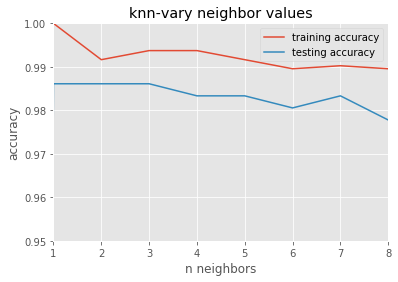

In [53]:
# Plot the results

plt.plot(array_accuracy_training, label = "training accuracy")
plt.plot(array_accuracy_testing, label = "testing accuracy")

plt.title("knn-vary neighbor values")
plt.xlabel("n neighbors")
plt.ylabel("accuracy")

plt.xlim([1,8])
plt.ylim([0.95,1])
plt.legend()

plt.show()


(0.8, 1.1)

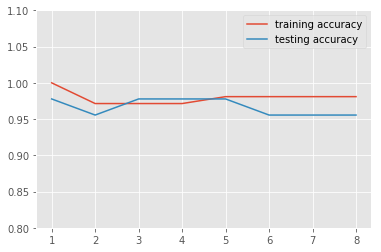

In [215]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3,
                                                   random_state=21, stratify=iris.target)

trainacc = []
testacc = []

for i in range(1,9):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    trainacc_score = knn.score(X_train,y_train)
    trainacc.append(trainacc_score)
    testacc_score = knn.score(X_test,y_test)
    testacc.append(testacc_score)

results = pd.DataFrame({"training accuracy":trainacc,"testing accuracy":testacc})

results.index=range(1,9) # the index is being plotted as Y axis, so I make the index the range of n_neighbours

results.plot()
plt.ylim(0.8,1.1)
#plt.xticks(range(0,9))

# REGRESSION
### .coef_
### .intercept_

* using the Boston dataset
boston = pd.read_csv('boston.csv')

In [216]:
boston = pd.read_csv("Datasets/Course 14 Supervised Learning/Boston.csv")
boston.head()

,CRIM,ZN,INDUS,CHAS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


<class 'numpy.ndarray'>


Text(0, 0.5, 'MEDV')

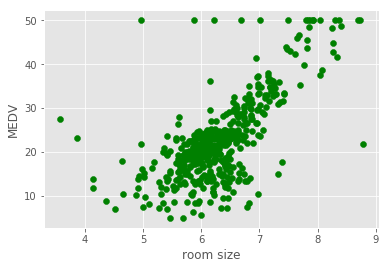

In [218]:
# Let's run a simple linear regression, predicting MEDV from the RM column

X = boston.loc[:,"RM"].values
y = boston.loc[:,"MEDV"].values

print(type(X)) # at the moment, both X and y are 1D arrays

# we can use the reshape to reduce this to a 1D array

X = X.reshape(-1,1) # -1 means to reduce the dimension to 1D
y = y.reshape(-1,1)

plt.scatter(X, y, c = 'g') # we can see there is a positive associaiton between room size and price
plt.xlabel("room size")
plt.ylabel("MEDV")



In [219]:
# We can now run a linear regression

from sklearn import linear_model

# instantiate the linear regression object

linreg = linear_model.LinearRegression()

# it is a good idea to fit the intercept, since we did NOT center the IVs

linreg = linear_model.LinearRegression(fit_intercept = True)

# fit the model to the data

linreg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

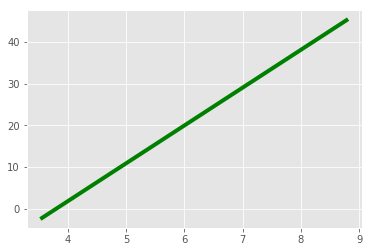

In [220]:
# Now we want to get some predicted values

# we don't have a testing dataset

# we can create a range of X_test values using np.linspace

test_x = np.linspace(min(X), max(X)).reshape(-1,1)
# create an array of EVENLY SPACED values from the min to the max of the actual X values (the rm size values)
# reshape using -1,1 to make it a SINGLE 1D array (not an ndarray)



# obtain predictions of Y with the test values
y_pred = linreg.predict(test_x) 

# we can plot the linear prediction line - the predicted values against the test x values

plt.plot(test_x, y_pred, color="green", linewidth=4)

In [222]:
# what is the coefficient for the predictor?

print("the value of the coefficient for room size:",linreg.coef_)
print("the value of the intercept:",linreg.intercept_)

the value of the coefficient for room size: [[9.10210898]]
the value of the intercept: [-34.67062078]


# Analysing the Aggregated GAPMINDER data
### USING linear_model.LinearRegression()
### ONLY takes (-1,1) reshaped arrays

In [224]:
import numpy as np
import pandas as pd

gap = pd.read_csv("Datasets/Course 14 Supervised Learning/gm_2008_region.csv")
gap.head()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region
0,34811059.0,2.73,0.1,3.328945,24.59620,12314.0,129.9049,75.3,29.5,Middle East & North Africa
1,19842251.0,6.43,2.0,1.474353,22.25083,7103.0,130.1247,58.3,192.0,Sub-Saharan Africa
2,40381860.0,2.24,0.5,4.785170,27.50170,14646.0,118.8915,75.5,15.4,America
3,2975029.0,1.40,0.1,1.804106,25.35542,7383.0,132.8108,72.5,20.0,Europe & Central Asia
4,21370348.0,1.96,0.1,18.016313,27.56373,41312.0,117.3755,81.5,5.2,East Asia & Pacific


In [268]:
# let's do a SIMPLE LINEAR regression on just fertility variable as the predictor of life expectancy

print(gap.head())

X = gap["fertility"].values
y = gap["life"].values

# then reshape

X = X.reshape(-1,1)
y = y.reshape(-1,1)

#view the shape
print(X.shape)
print(y.shape) #both are 1D arrays of 139 rows

lin = linear_model.LinearRegression()
lin.fit(X, y)

# print the R2
print("the R2 value is:", lin.score(X, y))

# print the coefficients 
print("the coeff value for fertility is:", lin.coef_[0][0])

   population  fertility  HIV        CO2  BMI_male      GDP  BMI_female  life  \
0  34811059.0       2.73  0.1   3.328945  24.59620  12314.0    129.9049  75.3   
1  19842251.0       6.43  2.0   1.474353  22.25083   7103.0    130.1247  58.3   
2  40381860.0       2.24  0.5   4.785170  27.50170  14646.0    118.8915  75.5   
3   2975029.0       1.40  0.1   1.804106  25.35542   7383.0    132.8108  72.5   
4  21370348.0       1.96  0.1  18.016313  27.56373  41312.0    117.3755  81.5   

   child_mortality                      Region  
0             29.5  Middle East & North Africa  
1            192.0          Sub-Saharan Africa  
2             15.4                     America  
3             20.0       Europe & Central Asia  
4              5.2         East Asia & Pacific  
(139, 1)
(139, 1)
the R2 value is: 0.6192442167740035
the coeff value for fertility is: -4.44387898978284


0.24303586677293798
[[-0.00141068]]
[67.72415057]


Text(0, 0.5, 'life expectancy')

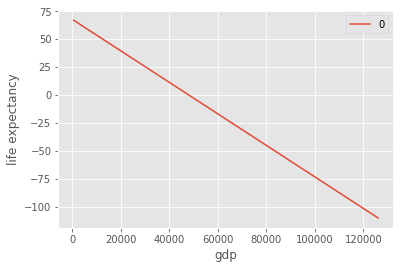

In [266]:
lin = linear_model.LinearRegression()

X = gap["GDP"].values.reshape(-1,1)
y = gap["child_mortality"].values.reshape(-1,1)

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=21)

lin.fit(Xtrain, ytrain)

print(lin.score(Xtest,ytest)) # this is the R2

print(lin.coef_)

print(lin.intercept_) #intercept is fitted

# plot the linear line

xvalues = np.linspace(min(Xtrain),max(Xtrain))

predictions = lin.predict(xvalues)
preds_df = pd.DataFrame(predictions)
preds_df.index = xvalues

preds_df.plot()
plt.xlabel("gdp")
plt.ylabel("life expectancy")

# the basics of linear regression

- use linear_model.LinearRegression()


* we will fit a linear regression model to the gapminder-life data above

0.6192442167740035


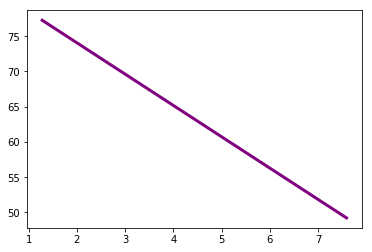

In [37]:
linreg = linear_model.LinearRegression()

linreg.fit(X,y)

# We dont have a test set, so let's create a test set using linspace

x_testvalues = np.linspace(min(X),max(X)).reshape(-1,1) # dont forget to reshape

# now get predicted values

y_predvalues = linreg.predict(x_testvalues)

plt.plot(x_testvalues, y_predvalues, color='purple', linewidth=3)

#get the accuracy score - the RMSE and R2 - use the training data (both the features and target)

print(linreg.score(X, y)) # prints out the R2 value

## EXAMINING OTHER METRICS OF ACCURACY FOR LINEAR REGRESSION

* gapminder data

### MULTIPLE REGRESSION

In [270]:
# Get arrays for the features and target
# target is "life"
# Here we are doing multiple regression

X = gap.drop(["life","Region"], axis = "columns") #extract ARRAY using values
y = gap["life"].values 


In [271]:
# Import necessary modules
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# let's repeat the linear regression but split the data first

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4) #stratify cant be used here

# We are using the LinearRegression module now

reg = LinearRegression()  # the intercept is FITTED by default. Note, the option to normalize!

reg.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [276]:
y_pred = reg.predict(X_test)

# let's look at the metrics - the R2 and the RMSEA

r2 = reg.score(X_test, y_test)

#MSE requires the TEST y-values, AND the PREDICTED y_values
# NOTE - the order of ACTUAL,PRED does NOT matter!
mse = mean_squared_error(y_test,y_pred)

rmsea = np.sqrt(mse) # the square root of the mean square error

In [275]:
print("the R2 is",r2)
print("the MSE is",mse)
print("the rmse is",rmsea)

the R2 is 0.8012263651017595
the MSE is 14.348811758694312
the rmse is 3.787982544666001


In [281]:
pd.DataFrame(reg.coef_, index=X.columns, columns = ["coeffs"])

array([-2.78022062e-10,  1.76000142e-01, -6.09853225e-01, -2.37663707e-01,
        3.73841172e-01,  1.30988173e-04, -1.47331150e-01, -1.35384586e-01])

In [85]:
# let's print the coefficients

coeffs = [reg.coef_[i] for i in range(0,X.shape[1])]

variables = X.columns

results_table = pd.DataFrame({'coeffs':coeffs}, index = variables)

results_table

,coeffs
population,-2.780221e-10
fertility,1.760001e-01
HIV,-6.098532e-01
CO2,-2.376637e-01
BMI_male,3.738412e-01
GDP,1.309882e-04
BMI_female,-1.473312e-01
child_mortality,-1.353846e-01


# CROSS VALIDATION

- Here we will be performing K folds cross validation
- We will be using CV to validate models >> i.e., to provide a more reliable test of a model's accuracy
- More folds makes computation more intense
- However, it ensures that we get MANY variations of test samples to test the model - thus, we obtqain a more reliable test of the model's accuracy

In [282]:
from sklearn.model_selection import cross_val_score


# Instantiate the linear reg model
reg=linear_model.LinearRegression()

# Note that we do not FIT the reg model in the usual way when we cross-validate
# the fitting (and prediction and scoring) is instead done on each fold using the cross_val_score
# Below, 5 folds are used

cv_results = cross_val_score(reg, X, y, cv=5) 

#let's print the results for each fold

print(cv_results)

#let's print the overall (average) accuracy

np.mean(cv_results)

[0.81720569 0.82917058 0.90214134 0.80633989 0.94495637]


0.859962772279345

In [112]:
# let's repeat the above using MULTIPLE regression

print(gap.head())

y = gap.life.values
X = gap.drop(["life","Region"], axis="columns").values #drop the Region column because it is NOT numeric

# DO NOT RESHAPE

# we dont need to create a training and test set- multiple sets are created in cross-validation
#instantiate the object

reg = LinearRegression()

#Now cross validate

crossval_results = cross_val_score(reg, X, y, cv=8)

print(crossval_results) #this is the R2 for each fold

# Print the mean R2

print("The average R2 value is",np.mean(crossval_results)) #0.84



   population  fertility  HIV        CO2  BMI_male      GDP  BMI_female  life  \
0  34811059.0       2.73  0.1   3.328945  24.59620  12314.0    129.9049  75.3   
1  19842251.0       6.43  2.0   1.474353  22.25083   7103.0    130.1247  58.3   
2  40381860.0       2.24  0.5   4.785170  27.50170  14646.0    118.8915  75.5   
3   2975029.0       1.40  0.1   1.804106  25.35542   7383.0    132.8108  72.5   
4  21370348.0       1.96  0.1  18.016313  27.56373  41312.0    117.3755  81.5   

   child_mortality                      Region  
0             29.5  Middle East & North Africa  
1            192.0          Sub-Saharan Africa  
2             15.4                     America  
3             20.0       Europe & Central Asia  
4              5.2         East Asia & Pacific  
[0.60050767 0.94354755 0.80019224 0.89295559 0.86933214 0.81609464
 0.92796908 0.9487358 ]
The average R2 value is 0.8499168379008678


In [115]:
# We can examine the results of a range of folds using a for loop
# I will examine R2 for folds ranging from 3 to 8

folds = np.arange(3,8)

results = [] #instantiate an empty list to hold the R2 values for each CV run using a different fold value
 
for i in folds:
    cv_results = cross_val_score(reg, X, y, cv=i)
    r2 = np.mean(cv_results)
    results.append(r2)



In [120]:
#lets view the list of MEAN R-SQUARED VALUES

print(results)

zipped_results=zip(folds,results)

#Convert the results to a dictionary - showing the FOLD NUMBER and the mean R2 next to it
print(dict(list(zipped_results)))

[0.8718712782622265, 0.8730246919339191, 0.8599627722793505, 0.8662794235505907, 0.8466169980423082]
{3: 0.8718712782622265, 4: 0.8730246919339191, 5: 0.8599627722793505, 6: 0.8662794235505907, 7: 0.8466169980423082}


### Practice with the KNN and iris dataset

* Use cross_val_score
* also using cross_validate

In [319]:
X = irisdf.iloc[:,0:4]
y = irisdf.iloc[:,4]

#Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

knn = KNeighborsClassifier(n_neighbors=6)

results = cross_val_score(knn, X, y, cv=5)

print(np.mean(results)) # mean accuracy over the 5 folds

## GETTING PRECISION - only works with binary classifiers

# Get the average accuracy across multiple values of cv

average_accuracies = []

for i in range(5,11):
    
    knn_new = KNeighborsClassifier(n_neighbors=5)
    
    accuracies = cross_val_score(knn_new, X, y, cv=i)
    
    av_accuracy = np.mean(accuracies)
    
    average_accuracies.append(av_accuracy)
    
average_accuracies

# put results in a dataframe

results = [list(range(5,11)),average_accuracies]
resultsdict = dict(list(zip(["cv_value","accuracy"],results)))
pd.DataFrame(resultsdict)



0.9800000000000001


,cv_value,accuracy
0,5,0.973333
1,6,0.966049
2,7,0.966837
3,8,0.966270
4,9,0.967901
5,10,0.966667


## USING CROSS_VALIDATE - more informative!

In [343]:
# I will make the data binary - then obtain multiple metrics
irisdf_dummies = pd.get_dummies(irisdf, columns=["species"], drop_first=True)
print(irisdf_dummies.columns)
X = irisdf_dummies.iloc[:,0:4]
y = irisdf_dummies["species_1"]

from sklearn.model_selection import cross_validate

crossvalidate = cross_validate(knn_new, X, y, cv=5, scoring=["accuracy","precision"]) # note I specified a scoring here

print(crossvalidate.keys())

# NOTE I specified MULTIPLE scoring criteria
# ANd the KEYS show I can examine accuracy, and precision

print(crossvalidate["test_precision"])




Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'species_1', 'species_2'],
      dtype='object')
dict_keys(['fit_time', 'score_time', 'test_accuracy', 'train_accuracy', 'test_precision', 'train_precision'])
[1.    1.    0.875 1.    1.   ]


### GETTING PREDICTIONS WHEN USIGN CROSS_VALIDATE
* we get predicted values for all folds

In [349]:
from sklearn.model_selection import cross_val_predict

# use the binary dataset above - predicting species 1

cvpredict = cross_val_predict(knn_new, X, y, cv=6)



## REGULARISED REGRESSION - RIDGE and LASSO - both normalize
### THIS DOES NOT NEED ARRAYS - CAN USE DATA FRAME AS PREDICTORS!

- The goal of regression to minimise the RMSE
- And to choose paramaters/coefficients (beta, intercept) to minimise the RMSE (loss function)
- However, LARGE coefficients can lead to overfitting - large coefficients can cause your model to predict anything well (in its own dataset >> overfitting) 
- Large coefficients mean that these predictors are highly influencing the model
- We thus need to therefore penalise large coefficients - using regularisation
- Unimportant predictors, however, are reduced (and in lasso regression, reduced to 0)


### RIDGE REGRESSION
- Very large positive and negative coefficients are penalised by multiplying them by a value called ALPHA - which reduces the size of the coefficients
    - We choose ALPHA through hyperparamater tuning - i.e., iterating over a grid of alpha values
- Also called lambda - a paramater that controls model complexity
    - In ridge regression, coefficients are squared and multiplied by alpha
    - When alpha is 0, then we simply get the OLS regression equation (large coefficients not penalised) - this may lead to a model that overfits to the current data
    - a HIGH alpha - large coeffs are severly penalised, leading to a VERY SIMPLE model that may underfit to new data



In [242]:
gap.head()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region
0,34811059.0,2.73,0.1,3.328945,24.59620,12314.0,129.9049,75.3,29.5,Middle East & North Africa
1,19842251.0,6.43,2.0,1.474353,22.25083,7103.0,130.1247,58.3,192.0,Sub-Saharan Africa
2,40381860.0,2.24,0.5,4.785170,27.50170,14646.0,118.8915,75.5,15.4,America
3,2975029.0,1.40,0.1,1.804106,25.35542,7383.0,132.8108,72.5,20.0,Europe & Central Asia
4,21370348.0,1.96,0.1,18.016313,27.56373,41312.0,117.3755,81.5,5.2,East Asia & Pacific


In [363]:
# Practice using the gapminder dataset (using multiple regression)

from sklearn.linear_model import Ridge


print(gap.head())

y = gap.life
X = gap.drop(["life","Region"], axis="columns") #drop the Region column because it is NOT numeric

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


   population  fertility  HIV        CO2  BMI_male      GDP  BMI_female  life  \
0  34811059.0       2.73  0.1   3.328945  24.59620  12314.0    129.9049  75.3   
1  19842251.0       6.43  2.0   1.474353  22.25083   7103.0    130.1247  58.3   
2  40381860.0       2.24  0.5   4.785170  27.50170  14646.0    118.8915  75.5   
3   2975029.0       1.40  0.1   1.804106  25.35542   7383.0    132.8108  72.5   
4  21370348.0       1.96  0.1  18.016313  27.56373  41312.0    117.3755  81.5   

   child_mortality                      Region  
0             29.5  Middle East & North Africa  
1            192.0          Sub-Saharan Africa  
2             15.4                     America  
3             20.0       Europe & Central Asia  
4              5.2         East Asia & Pacific  


In [364]:
### 1. RIDGE REGRESSION MODEL OBJECT

ridge = Ridge(alpha = 0.1, normalize = True)

#we set the alpha level
#we NORMALISE all our variables in this regualrised regression - all predictors will be on the same scale

# 2. FIT THE MODEL TO THE DATA

ridge.fit(X_train, y_train)

# 3. Get predicted values

y_preds = ridge.predict(X_test)

# 4. Score the model - always use the test set - dont use predicted values

score = ridge.score(X_test, y_test)

print(score)

0.8442469959975754


In [365]:
# view coefficients
print(X_train.shape)
ridge.coef_ # the same number of coefficients are returned as there are predictors

(97, 8)


array([-2.23173552e-09, -7.20742010e-01, -6.82296310e-01, -8.42872997e-02,
        5.45357047e-01,  1.18645184e-04, -2.87474139e-01, -6.66821839e-02])

In [369]:
# view the coefficients as a dataframe
coefficients = pd.DataFrame(ridge.coef_, index=X.columns, columns=["coeffs"]).sort_values(by="coeffs")

coefficients

,coeffs
fertility,-7.207420e-01
HIV,-6.822963e-01
BMI_female,-2.874741e-01
CO2,-8.428730e-02
child_mortality,-6.668218e-02
population,-2.231736e-09
GDP,1.186452e-04
BMI_male,5.453570e-01


([<matplotlib.axis.XTick at 0x1f55ad2ab00>,
 <a list of 8 Text xticklabel objects>)

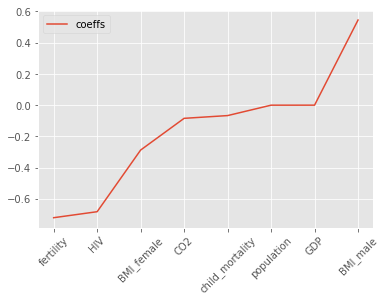

In [390]:
coefficients.plot()
plt.xticks(range(0,8),coefficients.index, rotation=45)

In [360]:
# get mean_squared_error

mean_squared_error(ridge.predict(X_test),y_test) #i.e., predictions, actual
print(np.sqrt(mean_squared_error(ridge.predict(X_test),y_test))) # get the RMSE


3.184829770970704


## LASSO regression

- Another type of regularisation
- Coefficients are absolute values (as opposed to being squared - as in ridge regression) and multiplied by alpha
- Useful for selecting IMPORTANT features - it shrinks coefficients of unimportant, small coefficient features to 0

In [351]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.1, normalize=True) # make the alpha a small value of 0.1. # normalise all predictors

lasso.fit(X_train, y_train)

y_lasso_preds = lasso.predict(X_test)

test_R2 = lasso.score(X_test, y_test)

print(test_R2)

0.8721296169613538


In [134]:
MSE = mean_squared_error(y_test, y_lasso_preds)

MSE

8.327333979866074

### Examining the coefficients following Lasso regression

8


Text(0, 0.5, 'coefficient B')

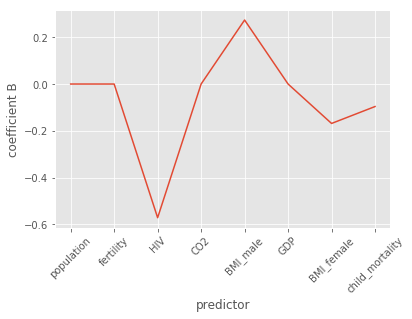

In [161]:
lasso_coeff = lasso.fit(X_train, y_train).coef_

lasso_coeff

# if we want to plot the coefficients - i.e., their size on the Y axis

# the x-axis should be the feature names - namely the width of the feature names

print(X.shape[1]) # this is the width of the feature names - can see we have 8 features

plt.plot(np.arange(0,8), lasso_coeff) # coefficients on the Y axis

# extract the column names from the gap dataset - and save it in a list
gap_shorter = gap.drop(["life","Region"], axis=1)
names = gap_shorter.columns

#now specify xticks - 8 ticks. And the column name on each tick (pass in "names")
plt.xticks(np.arange(0,8), names, rotation=45) 
plt.xlabel("predictor")
plt.ylabel("coefficient B")

## Regularization II: Ridge - use alpha values from 0.0001 to 10000
* Lasso is great for feature selection, but when building regression models, Ridge regression should be your first choice.

### lasso regression
* Recall that lasso performs regularization by adding to the loss function a penalty term of the absolute value of each coefficient multiplied by some alpha. 
* This is also known as L1 regularization because the regularization term is the L1 norm of the coefficients. This is not the only way to regularize, however.

### Ridge regression
* Takes the sum of the squared values of the coefficients multiplied by some alpha - this is computing the L2 norm. 

### Exercise
In this exercise, you will practice fitting ridge regression models over a range of different alphas, and plot cross-validated R2 scores for each, using this function that we have defined for you, which plots the R2 score as well as standard error for each alpha:

In [391]:
# We are using the gapminder data

y = gap.life.values
X = gap.drop(["life","Region"], axis="columns").values #drop the Region column because it is NOT numeric

In [169]:
# Let's first generate a series of alpha values - ranging from the log(-4) to the log(50)

In [392]:
rangenums = np.logspace(-4, 0, 50)

#this return 50 evenly spaced numbers on natural log scale (10^-4 to 10^0)
print(rangenums.min())
print(rangenums.max())

# these are the alpha values we will try

0.0001
1.0


In [179]:
# Import necessary modules
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

# now let's run a ridge regression for all the values in rangenums

# create empty list of the mean ridge scores (from cross validation)
ridge_scores = []

# create empty list for the SD of the ridge scores in each cross validation (across the 10 folds)
ridge_std_scores = []

for i in rangenums:
    
    ridge = Ridge(alpha = i, normalize=True)
    
    #Use Cross validation
    
    cv_scores = cross_val_score(ridge, X, y, cv=10)
    
    #Get the mean of the 10 folds (for this run through)
    mean_cv_score = np.mean(cv_scores)
    
    #append the mean
    ridge_scores.append(mean_cv_score)
    
    #get the SD of the 10 folds
    std_cv_score = np.std(cv_scores)
    
    #append the SD to the empty list
    ridge_std_scores.append(std_cv_score)

print(ridge_scores[0:10]) # we get 50 estimates of the R2 value - I only printed 10
print(ridge_std_scores[0:10])

[0.8436316582436035, 0.8436355351778291, 0.8436402092854227, 0.8436458433479143, 0.8436526328707327, 0.8436608124264009, 0.8436706631192081, 0.8436825213188557, 0.8436967888042883, 0.8437139444359396]
[0.07790543831843776, 0.0779005824970715, 0.07789472628673702, 0.07788766452333573, 0.07787915039132544, 0.07786888716047369, 0.07785651837076552, 0.07784161621409579, 0.07782366783959369, 0.07780205929577962]


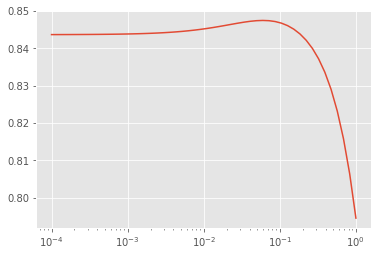

In [184]:
plt.plot(rangenums,ridge_scores) #plot the R2 values across the alpha values
plt.xscale("log") #use plt.xscale to set the Xaxis scale to log

# we can see that as alpha gets large in size, accuracy (measured by the R2 decreases)

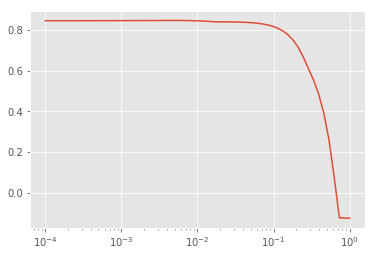

In [406]:
# we are working with the gapminder data again

alphas = np.logspace(-4,0,60)

mean_accuracies = []

for a in alphas:
    
    lasso = Lasso(alpha = a, normalize=True)
    
    cv_score = cross_val_score(lasso, X, y, cv=10)
    
    mean_accuracies.append(np.mean(cv_score))

plt.plot(alphas, mean_accuracies)
plt.xscale("log")

# HOW GOOD IS YOUR MODEL

- Accuracy is not always the best metric, for exmaple - a model could classify all emails as NOT SPAM
- And would be 99% accurate, but can't identify emails as spam - because there are SO FEW used to train the model
- Class imbalance can lead to very accurate models, but do poor on other metrics

### other metrics
- Accuracy = tp + tn / total N
- Precision = tp / tp + fp (percent of classified positives accurately predicted as positive), or positive predicted value - this is the proportion of correctly identified spam emails, out of all emails classified as spam.
    - e.g., a high precision means a high proportion of things you classified as spam, were spam (few false positives)
- Recall/Sensitivity - tp/tp+fn >> Proportion of correctly identified targets, out of the total number of targets (true positive rate, sensitivity)
    - e.g., a high sensitivity means a high proportion of the spams were detected (very few misses)
- f1 score = 2 x (precision x recall)/(precision + recall)









In [426]:
# We can use the iris data to practice this

X = iris.data
y = iris.target

In [427]:
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [423]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

knn=KNeighborsClassifier(n_neighbors=8)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4, random_state=42)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

#let's view the confusion matrix
print(confusion_matrix(y_test,y_pred)) #actual Y on the rows, predicted Y on the columns - 1 incorrect prediction

[[23  0  0]
 [ 0 19  0]
 [ 0  1 17]]


In [429]:
# display as heatmap

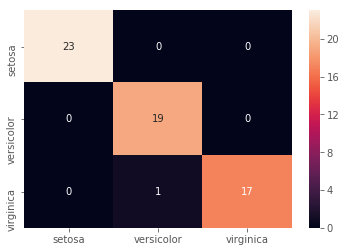

In [432]:
import seaborn as sns

confusionmatrix = confusion_matrix(y_test,y_pred)

confmatrixdf = pd.DataFrame(confusionmatrix, index=iris.target_names, columns = iris.target_names)

sns.heatmap(confmatrixdf, annot=True)

In [188]:
#Let's view classification report

print(classification_report(y_test,y_pred))

#there is a value called SUPPORT in the classification_report
#it is the number of samples in the TARGET that are in the test set

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       0.95      1.00      0.97        19
           2       1.00      0.94      0.97        18

   micro avg       0.98      0.98      0.98        60
   macro avg       0.98      0.98      0.98        60
weighted avg       0.98      0.98      0.98        60



## ONE vs REST CLASSIFIER
* Using the IRIS dataset
* It performs logistic regression, where every other category is the reference group.

In [3]:
from sklearn import datasets
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC

iris = datasets.load_iris()
X, y = iris.data, iris.target

y_df = pd.DataFrame(y)
y_df = y_df.iloc[:,0].astype("category")
y_df = pd.get_dummies(y_df)
X_df = pd.DataFrame(X)

ovr = OneVsRestClassifier(LogisticRegression(random_state=0))
ovr.fit(X_df, y_df)

# # get the predicted probabilities
ovr_results = ovr.predict_proba(X)
print(len(ovr_results))

print(ovr.coef_)
# # Note that we get 3 sets of coefficients
# # Meaning we have THREE equations, to predict each individual flower as the target (compared to the rest)

150
[[ 0.41021713  1.46416217 -2.26003266 -1.02103509]
 [ 0.4275087  -1.61211605  0.5758173  -1.40617325]
 [-1.70751526 -1.53427768  2.47096755  2.55537041]]


C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [11]:
logreg = LogisticRegression(multi_class="multinomial", solver="newton-cg")
logreg.fit(X, y)

logreg.coef_

array([[-0.42350768,  0.96735296, -2.51715154, -1.07933651],
       [ 0.53446022, -0.32158919, -0.20639208, -0.94429877],
       [-0.11095254, -0.64576378,  2.72354362,  2.02363528]])

# PIMA INDIANS DATA

* The goal is to predict whether or not a given female patient will contract diabetes based on features such as BMI, age, and number of pregnancies. 
* Therefore, it is a binary classification problem. A target value of 0 indicates that the patient does not have diabetes, while a value of 1 indicates that the patient does have diabetes. As in Chapters 1 and 2, the dataset has been preprocessed to deal with missing values.

In [434]:
diabetes.keys()

dict_keys(['data', 'target', 'DESCR', 'feature_names', 'data_filename', 'target_filename'])

In [446]:
from sklearn import datasets

diabetes = datasets.load_diabetes()

diabetes_df = pd.DataFrame(diabetes["data"])
diabetes_df.columns = diabetes["feature_names"]

diabetes_df.head()

target_df = pd.DataFrame(diabetes["target"])

merged_df = pd.concat([diabetes_df,target_df], axis = 1)

merged_df.head()




,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,0
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [447]:
#name the last column
colnames = diabetes["feature_names"]
colnames.append("diabetes")

merged_df.columns = colnames

In [9]:
# export the diabetes data

merged_df.to_csv("Datasets/Course 14 Supervised Learning/diabetes.csv")

In [448]:
merged_df.describe() # the mean of the last column is 152 - we can make a binary variable from this

merged_df["diab"] = np.where(merged_df["diabetes"] > 152, 1, 0)

# view the dataframe with the new column

merged_df.head()



,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,diabetes,diab
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0,0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0,0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0,0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0,1
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0,0


In [453]:
merged_df.notnull().all() # all columns have NO MISSING VALUES - hence KNN works here

age         True
sex         True
bmi         True
bp          True
s1          True
s2          True
s3          True
s4          True
s5          True
s6          True
diabetes    True
diab        True
dtype: bool

In [444]:
# NOW fill all na values - not necessary

merged_df.fillna(0, inplace=True)


In [454]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# let's compute some metrics

X = merged_df.drop(["diabetes","diab"], axis=1).values #drop BOTH the diabetes and diab columns!!

y = merged_df["diab"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# initialise KNN object

knn = KNeighborsClassifier(n_neighbors=8)

knn.fit(X_train,y_train)

# get predictions

y_preds = knn.predict(X_test)

# Now get confusion matrix and classification report
# This always takes in the y_test and y_predicted values

print(confusion_matrix(y_test,y_preds))
print(classification_report(y_test,y_preds))

[[66  9]
 [34 24]]
              precision    recall  f1-score   support

           0       0.66      0.88      0.75        75
           1       0.73      0.41      0.53        58

   micro avg       0.68      0.68      0.68       133
   macro avg       0.69      0.65      0.64       133
weighted avg       0.69      0.68      0.66       133



# Logistic Regression and ROC curve

- Logistic regression produces proppensity values - i.e., predicted probabilities of being in the TARGET category
- When it is above 0.5, it is classified as the target



In [238]:
### USE THE PIMA INDIANS DATA!

In [455]:
from sklearn.linear_model import LogisticRegression

#split data

logreg=LogisticRegression()

logreg.fit(X_train,y_train)

# Get predicted categories and predicted propensities

y_pred=logreg.predict(X_test) #this obtains the predicted category

y_propensity=logreg.predict_proba(X_test)[:,1] #obtain the predicted probabilies which are in the SECOND column of this object



C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [456]:
logreg.predict_proba(X_test)[0:5] 
# For the predict_proba object - column 0 has probabilities of being in the NEGATIVE category
# column 1 has the probailities of being in the TARGET/POSITIVE category - these are the values we want for ROC curve


array([[0.52370738, 0.47629262],
       [0.54738423, 0.45261577],
       [0.53589037, 0.46410963],
       [0.32670225, 0.67329775],
       [0.56321671, 0.43678329]])

In [457]:
# We use a 0.5 threshold to determine classification into the target class
# rows that have a propensity > 0.5, are classified into the target class

# We can look at the proportion of true positives and false positives as we vary the threshold value

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test,y_propensity)

# the ROC_CURVE returns three arrays - the FPR, TPR, and the thresholds pertaining to these fpr and tpr values

# we can now plot these values

Text(0.5, 1.0, 'ROC')

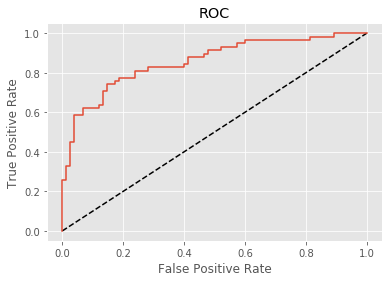

In [461]:
#we now plot the ROC curve

#empty plot

plt.plot([0, 1], [0,1], 'k--') # this plots a straight diagonal line 

#plot the data on top - line plot with FPR values on X, TPr values on Y

plt.plot(fpr,tpr,label='Logistic Regression')

plt.xlabel('False Positive Rate')

plt.ylabel('True Positive Rate')

plt.title("ROC")

In [297]:
print(classification_report(y_test,y_pred))

print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.70      0.97      0.81        75
           1       0.93      0.45      0.60        58

   micro avg       0.74      0.74      0.74       133
   macro avg       0.81      0.71      0.71       133
weighted avg       0.80      0.74      0.72       133

[[73  2]
 [32 26]]


### CROSS VALIDATION - and THE ROC - AREA UNDER THE CURVE metric
### SCORING = "ROC_AUC_CURVE"
* above we used the package roc_curve - but it did not compute the AUC
- both things take in:
    - the true y scores (from test set - y_test)
    - the propensities

In [298]:
# let's compute the AUC as another metric

from sklearn.metrics import roc_auc_score

# it requires the probabilities and the actual categories

print(roc_auc_score(y_test,y_propensity))

0.8563218390804598


In [474]:
# let's fit the logistic regression using cross validation

cv_scores = cross_val_score(logreg, X, y, cv = 10, scoring = "roc_auc") 

print(cv_scores) # prints all 

# the scoring section, we choose the metric we want to compute for each fold
# "accuracy", "precision" - can be used - but only ONE can be included - unless using cross_validate()

print("the five cross validation scores are: ",cv_scores)

print("the mean cv score is", np.mean(cv_scores))

[0.78       0.698      0.882      0.818      0.762      0.84842105
 0.92421053 0.82894737 0.78508772 0.89692982]
the five cross validation scores are:  [0.78       0.698      0.882      0.818      0.762      0.84842105
 0.92421053 0.82894737 0.78508772 0.89692982]
the mean cv score is 0.822359649122807


C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-package

# HYPERPARAMETER TUNING

In each of the previous examples:
- linear regression - we chose paramaters
- ridge and lasso regression, we chose an alpha value
- kNN we chose the number of neighbors k

However, we can tune each of the above hyperparamaters
- Trying out a bunch in combination
- Seeing which combination leads to the BEST fit to the test data
- it is ESSENTIAL to use CV to tune paramaters - and then test the final model on a test set

### HOW?

- We use GRIDSEARCH CROSS VALIDATION
- I.e., in logistic regression combined with L2 regularisation - we create a grid of C and alpha values
- Try all pairs and cross validate each model using each C-alpha combination


## K-Nearest neighbours

* use the Pima indians data

In [476]:
merged_df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,diabetes,diab
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0,0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0,0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0,0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0,1
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0,0


In [478]:
from sklearn.model_selection import GridSearchCV

# create the parameter grid - a dictionary. The key is the param. name, and the value is the range of values

param_grid = {'n_neighbors':np.arange(1,50)} # range of 1-50 neighbours

knn = KNeighborsClassifier()

# instantiate the knncv object

knn_cv = GridSearchCV(knn, param_grid, cv = 5) 

# For each neighbour value in param_grid, the knn model will be fit - and 5 folds will be generated
# a MEAN score across the folds is computed for each neighbour value

# Now we fit it to the data

knn_cv.fit(X, y)

# What were the best parameters? i.e., the best n_neighbors value??

print(knn_cv.best_params_)

# what was the best (MEAN, across the folds) accuracy score for the best neigbours value?

print(knn_cv.best_score_)

{'n_neighbors': 11}
0.7579185520361991


C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


### GETTING CLASSIFICATION METRICS
* with gridsearch cv - all metrics are based on the model with the best paramaters from the gridsearch

In [502]:
# Predicting values - will use the best paramaters

print(knn_cv.predict(X)[0:10]) # predict category

# predicting propensities

knn_cv.predict_proba(X)[0:5]

# get classification report

predictions = knn_cv.predict(X)

print(classification_report(predictions,y)) # NOTE - METRICS ARE USING THE TRAINING DATA

# get roc_auc_score

propensities = knn_cv.predict_proba(X)

roc_auc_score(y,propensities[:,1])

[1 0 0 1 0 0 0 0 0 1]
              precision    recall  f1-score   support

           0       0.85      0.78      0.82       269
           1       0.70      0.79      0.74       173

   micro avg       0.79      0.79      0.79       442
   macro avg       0.78      0.79      0.78       442
weighted avg       0.79      0.79      0.79       442



0.8643517076715457

## LOGISTIC REGRESSION
* Like the alpha parameter of lasso and ridge regularization that you saw earlier, logistic regression also has a regularization parameter: C. 
* C controls the inverse of the regularization strength
    * if C is very large - regularisation is small - thus overfitting (to the CURRENT DATA) is likely
    * if C is very small - regularisation is large (i.e., coefficients get reduced a lot, some to 0, and may not produce a good fitting model because information is lost) - and so underfitting (bias) to the CURRENT data, and thus fit poorly on new data
* We will tune values of C
* A large C can lead to an overfit model, while a small C can lead to an underfit model

In [328]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

c_range = np.logspace(-5,8,15) # this is a range of values from 10^-5 to 10^8

print(c_range.min(), c_range.max()) #print the min and max of the c_range

# create the paramater grid

param_grid = {'C':c_range}

# create logreg object

logreg = LogisticRegression()

# create GridSearchCV object

gridsearchcv = GridSearchCV(logreg, param_grid, cv = 6) 

# fit to the data

gridsearchcv.fit(X, y)

print("the best value of C is",gridsearchcv.best_params_)

print("\n")

print("the best mean cv accuracy score is",gridsearchcv.best_score_)

1e-05 100000000.0
the best value of C is {'C': 3.727593720314938}


the best mean cv accuracy score is 0.755656108597285


C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-package

# Hyperparameter tuning with RandomizedSearchCV
* GridSearchCV can be computationally expensive, especially if you are searching over a large hyperparameter space and dealing with multiple hyperparameters. 
* A solution to this is to use RandomizedSearchCV, in which not all hyperparameter values are tried out. 
* Instead, a fixed number of hyperparameter settings is sampled from specified probability distributions. 

## Decision trees
* Here, you'll also be introduced to a new model: the Decision Tree. 
* Decision trees in scikit-learn have .fit() and .predict() methods that you can use in exactly the same way as before.
* Decision trees have many parameters that can be tuned, such as max_features, max_depth, and min_samples_leaf: This makes it an ideal use case for RandomizedSearchCV.

### Paramaters
#### min samples leaf
* A split will only occur if BOTH leaves (at the split) have at least this number of observations in it (this is equivalent to the "minimum samples in child branch" in SPSS
* the default settings will LEAD TO THE MAXIMUM NUMBER OF LEAVES BEING GROWN - taking LONG on large data - i.e., FULLY GROWN TREE!

#### min samples split
* A node can only break into branches if it HAS AT LEAST THIS NUMBER of observations in it. This is the same as "minimum records in child branch" in SPSS

#### max_depth > refers to the depth of the tree

#### Criterion
* these refer to the criteria to determine if a split should be performed - the extent to whether it reduces the IMPURITY of the current node(i.e., the mix of 1's and 0's in that node) > does it make the branches more pure
    * in other words, does it lead to nodes (leaves) that only have people in ONE category of the DV
    * for the GINI - the goal is to REDUCE this value. If a split reduces the GINI by a considerable amount, then a NODE will be split into branches (at the particular value of the predictors)
    * ENTROPY on the other hand quantifies the homogeneity of the branching nodes. Again, lower values are better.
    * values of 1 for either GINI or ENTROPY mean the node is very impure - contains an even mix of ALL LEVELS OF THE DV
    
#### Max features
* Refers to the number of predictors considered when trying to split a node to best separate the observations in that node - i.e., how many features will it use to try to best separate the observations in that node?
   *  If int, then consider max_features features at each split.
   *     If float, then max_features is a fraction and int(PROPORTION * ALL_FEATURES) features are considered at each split. (e.g., if 0.5, and 12 features, then 6 features are considered)
   *     If “auto”, then max_features=sqrt(n_features).
   *     If “sqrt”, then max_features=sqrt(n_features).
    *    If “log2”, then max_features=log2(n_features).
    *    If None, then max_features=n_features.

#### Minimum impurity decrease
* We set these values to modify the early stopping of the process
* A node will be split if this split induces a decrease of the impurity (either the GINI, or ENTROPY) greater than or equal to this value
* A high value means that a split will be less likely and early stopping MORE LIKLEY!
* the default value is 0! so early stopping is thus, NOT INITIATED!

#### Random_state 
* ensures the same order of selection of features are used - the same combination considered each time when a SPLIT is being considered


### OUTPUT
* get feature_importances_

In [335]:
from random import randint

randint(1,9)

3

In [519]:
# let's create the paramater grid

param_dist = {"max_depth":[1, 3, 4, 5],
             "max_features": np.arange(1, 9), # adjust the max number of features to use in the model
             "min_samples_leaf": np.arange(1, 9), #minimum number of observations to break a node into a separate leaf
             "criterion":["gini","entropy"]}

# import the DecisionTreeClassifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

# create DT object

dt = DecisionTreeClassifier()

# create the RandomizedSearchCV object

dt_rand_cv = RandomizedSearchCV(dt, param_dist, cv=8, scoring='recall')

# fit to the data

dt_rand_cv.fit(X, y)

#PRINT THE RESULTS

print(dt_rand_cv.best_params_)

print(dt_rand_cv.best_score_)

{'min_samples_leaf': 2, 'max_features': 6, 'max_depth': 4, 'criterion': 'entropy'}
0.6508521870286577


C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [517]:
preds = dt_rand_cv.predict(X)
probs = dt_rand_cv.predict_proba(X)
print(classification_report(y,preds))
print("AUC is", roc_auc_score(y,probs[:,1]))
print("accuracy is",dt_rand_cv.score(X,y))

              precision    recall  f1-score   support

           0       0.72      0.88      0.79       247
           1       0.78      0.56      0.65       195

   micro avg       0.74      0.74      0.74       442
   macro avg       0.75      0.72      0.72       442
weighted avg       0.75      0.74      0.73       442

AUC is 0.8265649330426659
accuracy is 0.558974358974359


# LOGISTIC REGRESSION - C PARAMATER
# HOLDOUT SET FOR FINAL EVALUATION - PIMA

- How well will our model perform on new data?
- Need to test the selected BEST tuned paramaters to a test set
- This provides a better prediction of how well the model will work on new data



### Hold-out set in practice I: Classification
- We will evaluate a model with tuned hyperparameters on a hold-out set. 
- In addition to C, logistic regression has a 'penalty' hyperparameter which specifies whether to use 'l1' or 'l2' regularization. We will create a grid that modifies BOTH the C and penalty values, select the best params via cross_validation, then test the best parameter set using a holdout test dataset


### Values of C to use 
* 0.0001, 0.001, 0.01, 0.1, 1

In [390]:
# Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

crange = np.logspace(-4,4,50)

param_grid = {"C":crange,"penalty":["l1","l2"]} # penalty can either be the L1 (lasso) or L2 (ridge) norm

logreg = LogisticRegression()

logregcv = GridSearchCV(logreg, param_grid, cv=10)

# Get a training split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#fit the model to the data - DO IT TO THE TRAINING DATA

logregcv.fit(X_train, y_train)

len(X_train), len(y_train)

# get the best paramaters



C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-package

C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-package

C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-package

C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-package

C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-package

C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-package

C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-package

C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-package

C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-package

C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-package

C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-package

(309, 309)

In [392]:
print(logregcv.best_params_)
print(logregcv.best_score_)

{'C': 1.7575106248547894, 'penalty': 'l1'}
0.7411003236245954


In [396]:
# Lets test the accuracy of the model to the new data

y_preds = logregcv.predict(X_test)

print(confusion_matrix(y_test,y_preds))

print(classification_report(y_test,y_preds))

[[64 11]
 [22 36]]
              precision    recall  f1-score   support

           0       0.74      0.85      0.80        75
           1       0.77      0.62      0.69        58

   micro avg       0.75      0.75      0.75       133
   macro avg       0.76      0.74      0.74       133
weighted avg       0.75      0.75      0.75       133



## USING A HOLDOUT SET WITH THE IRIS DATA



In [535]:
irisdf_dummies.head()

# predict species_2

iv = irisdf_dummies.iloc[:,0:4]
dv = irisdf_dummies["species_2"]

ivtrain, ivtest, dvtrain, dvtest = train_test_split(iv, dv, random_state=21, test_size=0.4, stratify=dv)

# create param grid for logistic regression

param_grid = {"C":np.logspace(-4,0,20),"penalty":["l1","l2"]}

# Note I used 20 evenly spaced values from 0.0001 to 1 (via np.logspace)

# instantiate GridSearchCV

logreg = LogisticRegression()

irisgridsearch = GridSearchCV(logreg, param_grid=param_grid, cv=10, scoring='accuracy')

irisgridsearch.fit(ivtrain,dvtrain)



C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-package

C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-package

C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-package

C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-package

C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-package

C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-package

C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-package

C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-package

C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-package

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': array([1.00000e-04, 1.62378e-04, 2.63665e-04, 4.28133e-04, 6.95193e-04,
       1.12884e-03, 1.83298e-03, 2.97635e-03, 4.83293e-03, 7.84760e-03,
       1.27427e-02, 2.06914e-02, 3.35982e-02, 5.45559e-02, 8.85867e-02,
       1.43845e-01, 2.33572e-01, 3.79269e-01, 6.15848e-01, 1.00000e+00]), 'penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

{'C': 0.03359818286283781, 'penalty': 'l2'}
              precision    recall  f1-score   support

           0       1.00      0.97      0.99        40
           1       0.95      1.00      0.98        20

   micro avg       0.98      0.98      0.98        60
   macro avg       0.98      0.99      0.98        60
weighted avg       0.98      0.98      0.98        60

0.9974999999999999


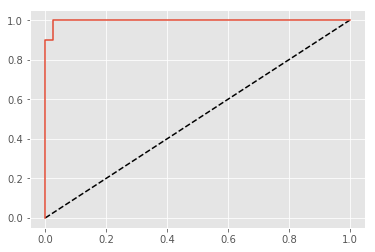

In [543]:
# get best params

print(irisgridsearch.best_params_)
irisgridsearch.best_score_

# get some metrics
preds = irisgridsearch.predict(ivtest)
probs = irisgridsearch.predict_proba(ivtest)

print(classification_report(dvtest,preds))

print(roc_auc_score(dvtest,probs[:,1]))

fpr, tpr, thresholds = roc_curve(dvtest,probs[:,1])
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr)

## using LASSO regression



In [547]:
gap.head()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region
0,34811059.0,2.73,0.1,3.328945,24.59620,12314.0,129.9049,75.3,29.5,Middle East & North Africa
1,19842251.0,6.43,2.0,1.474353,22.25083,7103.0,130.1247,58.3,192.0,Sub-Saharan Africa
2,40381860.0,2.24,0.5,4.785170,27.50170,14646.0,118.8915,75.5,15.4,America
3,2975029.0,1.40,0.1,1.804106,25.35542,7383.0,132.8108,72.5,20.0,Europe & Central Asia
4,21370348.0,1.96,0.1,18.016313,27.56373,41312.0,117.3755,81.5,5.2,East Asia & Pacific


In [556]:
y = gap["life"]
X = gap.drop(["life","Region"], axis=1)

xtrain, xtest, ytrain, ytest = train_test_split(X, y, random_state=21, test_size=0.4)

alphas = np.logspace(-4,4,50)

param_grid = {"alpha":alphas}

lasso = Lasso()

lassogrid=GridSearchCV(lasso, param_grid, cv=10)

lassogrid.fit(xtrain,ytrain)

C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': array([1.00000e-04, 1.45635e-04, 2.12095e-04, 3.08884e-04, 4.49843e-04,
       6.55129e-04, 9.54095e-04, 1.38950e-03, 2.02359e-03, 2.94705e-03,
       4.29193e-03, 6.25055e-03, 9.10298e-03, 1.32571e-02, 1.93070e-02,
       2.81177e-02, 4.09492e-02, 5.96362e-02, 8.68511e-02, 1.26... 1.04811e+03, 1.52642e+03,
       2.22300e+03, 3.23746e+03, 4.71487e+03, 6.86649e+03, 1.00000e+04])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [571]:
print(lassogrid.best_score_) # This is the R2 value
print(lassogrid.best_params_)

preds = lassogrid.predict(xtest)

print(np.corrcoef(preds,ytest)**2)  

print(mean_squared_error(preds,ytest))

# get the R2 - alternative - (using .score)
lassogrid.score(xtest,ytest)


0.8441554778005731
{'alpha': 0.3906939937054613}
[[1.         0.85571159]
 [0.85571159 1.        ]]
13.205557948757688


0.8298427296600127

# ELASTIC NET LINEAR REGRESSION
## Use values ranging from 0 to 1 (np.linspace)

### Hold-out set in practice II: Regression
* Lasso regression used the L1 penalty to regularize, while ridge used the L2 penalty. 
* There is another type of regularized regression known as the elastic net. In elastic net regularization, the penalty term is a linear combination of the L1 and L2 penalties:

        - a∗L1+b∗L2


* In scikit-learn, this term is represented by the 'l1_ratio' parameter:
    * An 'l1_ratio' of 1 corresponds to an L1 penalty (full lasso regression), and anything lower is a combination of L1 and L2. A value of 0, would be equivalent to full ridge regression
    * In this exercise, you will GridSearchCV to tune the 'l1_ratio' of an elastic net model trained on the Gapminder data. As in the previous exercise, use a hold-out set to evaluate your model's performance.

In [544]:
import numpy as np
import pandas as pd

gap = pd.read_csv("Datasets/Course 14 Supervised Learning/gm_2008_region.csv")
gap.head()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region
0,34811059.0,2.73,0.1,3.328945,24.59620,12314.0,129.9049,75.3,29.5,Middle East & North Africa
1,19842251.0,6.43,2.0,1.474353,22.25083,7103.0,130.1247,58.3,192.0,Sub-Saharan Africa
2,40381860.0,2.24,0.5,4.785170,27.50170,14646.0,118.8915,75.5,15.4,America
3,2975029.0,1.40,0.1,1.804106,25.35542,7383.0,132.8108,72.5,20.0,Europe & Central Asia
4,21370348.0,1.96,0.1,18.016313,27.56373,41312.0,117.3755,81.5,5.2,East Asia & Pacific


In [545]:
# use the gapminder data

y = gap.life.values
X = gap.drop(["life","Region"], axis="columns").values #drop the Region column because it is NOT numeric

# the DV is life experiency

print(gap.head())

# create the parameter grid for the l1 ratio

import numpy as np
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

numbers = np.linspace(0.01,1,50) # 50 evenly spaced values between 0 and 1
l1_range = {"l1_ratio":numbers} # the paramater is called l1 ratio in the elasticnet model

# instantiate the elasticnet object

en = ElasticNet()

# instantiate gridsearch

en_cv = GridSearchCV(en, l1_range, cv = 10)

# split the data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

# fit to the training data

en_cv.fit(X_train, y_train)


   population  fertility  HIV        CO2  BMI_male      GDP  BMI_female  life  \
0  34811059.0       2.73  0.1   3.328945  24.59620  12314.0    129.9049  75.3   
1  19842251.0       6.43  2.0   1.474353  22.25083   7103.0    130.1247  58.3   
2  40381860.0       2.24  0.5   4.785170  27.50170  14646.0    118.8915  75.5   
3   2975029.0       1.40  0.1   1.804106  25.35542   7383.0    132.8108  72.5   
4  21370348.0       1.96  0.1  18.016313  27.56373  41312.0    117.3755  81.5   

   child_mortality                      Region  
0             29.5  Middle East & North Africa  
1            192.0          Sub-Saharan Africa  
2             15.4                     America  
3             20.0       Europe & Central Asia  
4              5.2         East Asia & Pacific  


C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'l1_ratio': array([0.01   , 0.0302 , 0.05041, 0.07061, 0.09082, 0.11102, 0.13122,
       0.15143, 0.17163, 0.19184, 0.21204, 0.23224, 0.25245, 0.27265,
       0.29286, 0.31306, 0.33327, 0.35347, 0.37367, 0.39388, 0.41408,
       0.43429, 0.45449, 0.47469, 0.4949 , 0.5151 , 0.53531, 0.555...16, 0.83837,
       0.85857, 0.87878, 0.89898, 0.91918, 0.93939, 0.95959, 0.9798 ,
       1.     ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [19]:
# let's view the best paramaters

print(en_cv.best_params_, en_cv.best_score_)

# predicted values

y_preds = en_cv.predict(X_test)

# let's get the metrics 
# for linear regression - R2, and the MSE, and the RMSE

print("the R2 value is", en_cv.score(X_test, y_test))

print("the MSE is", mean_squared_error(y_test, y_preds))

print("the RMSE is", np.sqrt(mean_squared_error(y_test, y_preds)))

{'l1_ratio': 0.01} 0.8688816389834464
the R2 value is 0.8440689429835154
the MSE is 10.154736059696999
the RMSE is 3.186649660646272


# Pre-processing data

## dealing with categorical features

SKlearn doesnt accept categorical features by default
- we need to make them numerical, convert them to J-1 dummy variables
- Options to do this include: onehot encoder or get dummies

In [20]:
# let's use the gapminder data
gap.head()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region
0,34811059.0,2.73,0.1,3.328945,24.59620,12314.0,129.9049,75.3,29.5,Middle East & North Africa
1,19842251.0,6.43,2.0,1.474353,22.25083,7103.0,130.1247,58.3,192.0,Sub-Saharan Africa
2,40381860.0,2.24,0.5,4.785170,27.50170,14646.0,118.8915,75.5,15.4,America
3,2975029.0,1.40,0.1,1.804106,25.35542,7383.0,132.8108,72.5,20.0,Europe & Central Asia
4,21370348.0,1.96,0.1,18.016313,27.56373,41312.0,117.3755,81.5,5.2,East Asia & Pacific


Text(0.5, 1.0, '')

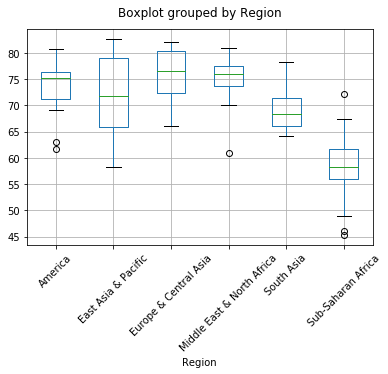

In [22]:
import matplotlib.pyplot as plt

gap.boxplot(column = "life", by = "Region", rot=45)
#plt.xlabel(rot=45)
plt.title(None)

In [572]:
# now let's use pd.get_dummies

# this will automatically make dummy variables for all object columns

gap_region = pd.get_dummies(gap, columns = ["Region"], drop_first=True) 
#drop_first will drop the dummy column for "Region_America", first alphebtically


In [573]:
gap_region.head() # now we have J-1 dummy variables for region

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region_East Asia & Pacific,Region_Europe & Central Asia,Region_Middle East & North Africa,Region_South Asia,Region_Sub-Saharan Africa
0,34811059.0,2.73,0.1,3.328945,24.59620,12314.0,129.9049,75.3,29.5,0,0,1,0,0
1,19842251.0,6.43,2.0,1.474353,22.25083,7103.0,130.1247,58.3,192.0,0,0,0,0,1
2,40381860.0,2.24,0.5,4.785170,27.50170,14646.0,118.8915,75.5,15.4,0,0,0,0,0
3,2975029.0,1.40,0.1,1.804106,25.35542,7383.0,132.8108,72.5,20.0,0,1,0,0,0
4,21370348.0,1.96,0.1,18.016313,27.56373,41312.0,117.3755,81.5,5.2,1,0,0,0,0


In [25]:
print(gap_region.columns)

Index(['population', 'fertility', 'HIV', 'CO2', 'BMI_male', 'GDP',
       'BMI_female', 'life', 'child_mortality', 'Region_East Asia & Pacific',
       'Region_Europe & Central Asia', 'Region_Middle East & North Africa',
       'Region_South Asia', 'Region_Sub-Saharan Africa'],
      dtype='object')


In [36]:
# we can now use ALL the columns in regression!

y = gap_region.life.values
X = gap_region.drop("life", axis = "columns").values

# let's do Ridge regression, and use CV to test model accuracy

from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

# create ridge object

ridge = Ridge(alpha=0.5, normalize=True)

# fit the ridge_cv model using the cross_val_score (we are not doing a grid search)

ridge_cv = cross_val_score(ridge, X, y, cv=10)

print(ridge_cv)

print(np.mean(ridge_cv))

[0.83461901 0.85006733 0.81156508 0.82238041 0.6112031  0.89497457
 0.84227277 0.72230273 0.89853135 0.87657433]
0.8164490674382774


## Handling MISSING DATA



In [ ]:
# we will use the 

In [574]:
parties = pd.read_csv("Datasets/Course 14 Supervised Learning/house-votes-84.csv",
                     na_values="?",header=None)

parties.head()

#replace n and y values

parties = parties.replace({'n':0,'y':1})
parties.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0


In [575]:
# let's examine this dataset to see if it has missing values

colnames = ['party','infants','water','budget','physician','salvador','religious','satellite','aid','missile',
           'immigration','synfuels','education','superfund','crime','duty_free_exports','eaa_rsa']

parties.columns = colnames

parties.info() # several columns have missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435 entries, 0 to 434
Data columns (total 17 columns):
party                435 non-null object
infants              423 non-null float64
water                387 non-null float64
budget               424 non-null float64
physician            424 non-null float64
salvador             420 non-null float64
religious            424 non-null float64
satellite            421 non-null float64
aid                  420 non-null float64
missile              413 non-null float64
immigration          428 non-null float64
synfuels             414 non-null float64
education            404 non-null float64
superfund            410 non-null float64
crime                418 non-null float64
duty_free_exports    407 non-null float64
eaa_rsa              331 non-null float64
dtypes: float64(16), object(1)
memory usage: 57.9+ KB


In [45]:
parties.water.isna().sum() # there are 48 missing values in the water column

48

In [577]:
# which columns have missing values

parties.isna().any() # all columns except the party column

party                False
infants               True
water                 True
budget                True
physician             True
salvador              True
religious             True
satellite             True
aid                   True
missile               True
immigration           True
synfuels              True
education             True
superfund             True
crime                 True
duty_free_exports     True
eaa_rsa               True
dtype: bool

### REPLACE THE MISSING VALUES

* we can use the .replace()


In [47]:
# for example: 
parties.replace(np.nan, 0) # this is how we replace NANS with 0

In [ ]:
# Or we can drop any observations (rows) that have na

parties = parties.dropna() # any ROWS with missing data are dropped! # this might delete many observations

# a threshold value can be set to prevent deleting all rows

# missing data imputation



In [50]:
parties.head()

,party,infants,water,budget,physician,salvador,religious,satellite,aid,missile,immigration,synfuels,education,superfund,crime,duty_free_exports,eaa_rsa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0


In [578]:
from sklearn.preprocessing import Imputer

# we can use the imputer to automatically impute missing values with the method we specify

# 1. instantiate the imputer

imp = Imputer(missing_values="NaN", strategy="mean", axis=0) 
#imputes cells with the means imputed DOWN THE ROWS (colmeans)

# 2. fit the imputer to the data -
# BUT we must first get rid of the string column "party"

X = parties.drop("party", axis = 1)

# 3. Now fit the imputer to the X values

imp.fit(X)

# 4. Now use the imputer to TRANSFORM the data - i.e., fill in the means

X = imp.transform(X)

C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [580]:
# OR can we use fit transform

imp.fit_transform(X)# Yes this also works

array([[0.        , 1.        , 0.        , ..., 1.        , 0.        ,
        1.        ],
       [0.        , 1.        , 0.        , ..., 1.        , 0.        ,
        0.81268882],
       [0.44208038, 1.        , 1.        , ..., 1.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.50387597, 0.        , ..., 1.        , 0.        ,
        1.        ],
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        1.        ],
       [0.        , 1.        , 0.        , ..., 1.        , 0.42751843,
        0.        ]])

In [ ]:
#### PIPELINE 
#allows you to impute data WITHIN a pipeline and runthe analaysis at once

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Imputer


imp = Imputer(missing_values="NaN", strategy='mean', axis=0)

logreg=LogisticRegression()

#now create a list of preprocessing steps in a pipeline

steps = [('imputation', imp), #first impute the data
        ('logistic_regression', logreg)] #then perform a logreg on it


pipeline = Pipeline(steps) #create a PIPELINE OBVJECT

#SPLIT THE DATA
X_train etc...

#NOW FIT THE PIPELINE to the training set (data)

pipeline.fit(X_train, y_train)

#get predicted values

y_pred = pipeline.predict(X_test)

#accuracy

pipeline.score(X_test, y_test)


#IN A PIPELINE - each STEP must be a TRANSFORMER except the last
#the last is a model - an estimator - regressor, classifier

# COMBINING GRID SEARCH WITH PIPELINES
# LOGISTIC REGRESSION

* "log__C"
* "log__penalty"

In [613]:
# Parties pipeline

parties.head()

# Create pipeline 

dv = parties.party
iv = parties.drop("party", axis=1)

xtr, xte, ytr, yte = train_test_split(iv, dv, test_size=0.4, random_state=21, stratify=dv)

imp = Imputer(missing_values=np.nan, strategy="mean")  # axis=0 is the default (i.e., impute with a COLUMNS mean)
norm = Normalizer() #normalize all predictors
scaler = StandardScaler() # then Standardise them
log = LogisticRegression()

steps = [("imp",imp),
         ("norm",norm),
         ("scaler",scaler),
          ("log",log)]

pl = Pipeline(steps)

param_grid = {"log__C":np.logspace(-4,3),
             "log__penalty":["l1","l2"]}  #the "log" word, must MATCH the step in the pipeline referring to logistic

# Now perform GridSearchCV

gridsearchparties = GridSearchCV(pl, param_grid, cv=10)

gridsearchparties.fit(xtr,ytr)

C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\z3160256\AppData\Local\Continuu

C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 

C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Defa

C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 

C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Defa

C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Defa

C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 

C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 

C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Defa

C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Defa

C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Defa

C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 

C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 

C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Defa

C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 

C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Defa

C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Defa

C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 

C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Defa

C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 

C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Defa

C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 

C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 

C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 

C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 

C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Defa

C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Defa

C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Defa

C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Defa

C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Defa

C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 

C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 

C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Defa

C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Defa

C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 

C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Defa

C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 

C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 

C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 

C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 

C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 

C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 

C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Defa

C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 

C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('imp', Imputer(axis=0, copy=True, missing_values=nan, strategy='mean', verbose=0)), ('norm', Normalizer(copy=True, norm='l2')), ('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('log', LogisticRegression(C=1.0, class_weight=None, dual...enalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False))]),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'log__C': array([1.00000e-04, 1.38950e-04, 1.93070e-04, 2.68270e-04, 3.72759e-04,
       5.17947e-04, 7.19686e-04, 1.00000e-03, 1.38950e-03, 1.93070e-03,
       2.68270e-03, 3.72759e-03, 5.17947e-03, 7.19686e-03, 1.00000e-02,
       1.38950e-02, 1.93070e-02, 2.68270e-02, 3.72759e-02, 5.1...    2.68270e+02, 3.72759e+02, 5.17947e+02, 7.19686e+02, 1.00000e+03]), 'log__penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
   

In [614]:
# we can examine the following
gridsearchparties.best_score_
gridsearchparties.best_params_

accuracy = gridsearchparties.score(xte,yte)

preds = gridsearchparties.predict(xte)

print(classification_report(yte,preds))

probs = gridsearchparties.predict_proba(xte)

print(roc_auc_score(yte,probs[:,1]))

              precision    recall  f1-score   support

    democrat       0.99      0.93      0.96       107
  republican       0.89      0.99      0.94        67

   micro avg       0.95      0.95      0.95       174
   macro avg       0.94      0.96      0.95       174
weighted avg       0.95      0.95      0.95       174

0.9806807086065001


# FINAL EXAMPLE - the PARTIES DATASET

In [57]:
parties_final = pd.read_csv("Datasets/Course 14 Supervised Learning/house-votes-84.csv")
parties_final.head()

,republican,n,y,n.1,y.1,y.2,y.3,n.2,n.3,n.4,y.4,?,y.5,y.6,y.7,n.5,y.8
0,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
1,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
2,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
3,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y
4,democrat,n,y,y,n,y,y,n,n,n,n,n,n,y,y,y,y


In [59]:
colnames = ['party',
 'infants',
 'water',
 'budget',
 'physician',
 'salvador',
 'religious',
 'satellite',
 'aid',
 'missile',
 'immigration',
 'synfuels',
 'education',
 'superfund',
 'crime',
 'duty_free_exports',
 'eaa_rsa']

In [62]:
# add column names

parties_final.columns = colnames

parties_final.head()

# replace missing values, denoted by ?

# can use this method

parties_final[parties_final == "?"] = np.nan
print(parties_final.head()) # all missing values have been replaced

        party infants water budget physician salvador religious satellite aid  \
0  republican       n     y      n         y        y         y         n   n   
1    democrat     NaN     y      y       NaN        y         y         n   n   
2    democrat       n     y      y         n      NaN         y         n   n   
3    democrat       y     y      y         n        y         y         n   n   
4    democrat       n     y      y         n        y         y         n   n   

  missile immigration synfuels education superfund crime duty_free_exports  \
0       n           n        n         y         y     y                 n   
1       n           n        y         n         y     y                 n   
2       n           n        y         n         y     n                 n   
3       n           n        y       NaN         y     y                 y   
4       n           n        n         n         y     y                 y   

  eaa_rsa  
0     NaN  
1       n  
2       

In [82]:
# replace the Y's and N's with 1's and 0's

parties_final = parties_final.replace({"y":1,"n":0})

In [84]:
# count the number of missing values in each column

parties_final.isnull().sum()

party                  0
infants               12
water                 48
budget                11
physician             11
salvador              15
religious             11
satellite             14
aid                   15
missile               22
immigration            7
synfuels              20
education             31
superfund             25
crime                 17
duty_free_exports     28
eaa_rsa              104
dtype: int64

In [85]:
# we can drop all rows with a missing value on at least one column

# first see the current shape

print(parties_final.shape)

# now drop rows with na values

parties_final_dropped = parties_final.dropna(axis=0)
print(parties_final_dropped.shape) # the data frame has reduced to 232 rows from 434

(434, 17)
(232, 17)


In [86]:
parties_final.describe()

,infants,water,budget,physician,salvador,religious,satellite,aid,missile,immigration,synfuels,education,superfund,crime,duty_free_exports,eaa_rsa
count,422.000000,386.000000,423.000000,423.000000,419.000000,423.000000,420.000000,419.000000,412.000000,427.000000,414.000000,403.000000,409.000000,417.000000,406.000000,330.000000
mean,0.443128,0.502591,0.598109,0.416076,0.503580,0.640662,0.569048,0.577566,0.502427,0.503513,0.362319,0.421836,0.508557,0.592326,0.428571,0.812121
std,0.497345,0.500642,0.490861,0.493490,0.500585,0.480375,0.495800,0.494537,0.500602,0.500574,0.481252,0.494466,0.500539,0.491992,0.495482,0.391209
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Creating a preprocessing pipeline 

* There are many steps to building a model, from creating training and test sets, to fitting a classifier or regressor, to tuning its parameters, to evaluating its performance on new data. 
* Imputation can be seen as the first step of this machine learning process, the entirety of which can be viewed within the context of a pipeline. 
* Scikit-learn provides a pipeline constructor that allows you to piece together these steps into one process and thereby simplify your workflow.

In [100]:
from sklearn.preprocessing import Imputer
from sklearn.svm import SVC

# the pipeline will include pre-processing steps and model steps
# These are all INSTANTIATION steps, and not fitting steps - i.e., no fitting to our data

# 1. instantiate the imputer object

imp = Imputer(missing_values = "NaN", strategy = "most_frequent", axis = 0)

# 2. Instantiate the SVC object (support vector classifier)

svc = SVC() # we are simply using default settings for the SVC

# 3. set up the pipeline (no model fitting yet) - it is a tuple list, with step name, and the objects from above

steps = [("imputation", imp),
        ("svm", SVC())]

C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [96]:
# now we fit the pipeline to the data

# Import necessary modules
from sklearn.preprocessing import Imputer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

steps = [('imputation', Imputer(missing_values='NaN', strategy='most_frequent', axis=0)),
        ('SVM', SVC())]  
# this is a repeat of what we did above

C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [108]:
from sklearn.preprocessing import Imputer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


# 4. Create the pipeline from the steps

pipeline = Pipeline(steps)

# 5. Create the training and testing data

y = parties_final.party.values
X = parties_final.drop("party", axis="columns").values

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size = 0.3)

# 6. Now we fit the pipeline to the training data

pipeline.fit(X_train, y_train)

# 7. Get predicted values (always get predicted values)

y_preds = pipeline.predict(X_test)

# 8. Get the classification report

print(classification_report(y_test,y_preds))
print(confusion_matrix(y_test,y_preds))

# 9. score the model

print(pipeline.score(X_test,y_test))

              precision    recall  f1-score   support

    democrat       1.00      0.93      0.96        83
  republican       0.89      1.00      0.94        48

   micro avg       0.95      0.95      0.95       131
   macro avg       0.94      0.96      0.95       131
weighted avg       0.96      0.95      0.95       131

[[77  6]
 [ 0 48]]
0.9541984732824428


C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


## Centering and SCALING

- We need to scale predictors for many reasons
- Many models use a form of distance to inform them
    - kNN for example, explicitly uses distances between points on feature spaces
- Consequently, features that are encoded on LARGER scales will have an UNDUE INFLUENCE on the model - they will dominate the training of the model (thus leading to overfitting)
- hence, we WANT features to be on a similar scale


### WAYS TO NORMALISE

- Standardising (Z scores)
- MinMax scaling - i.e., subtract the minimum, and divide by the range (max-min)
- Normalise so that the data ranges from -1 to 1, or from 0 to 1

In [32]:
# Use the white wine dataset

wine = pd.read_csv("Datasets/Course 14 Supervised Learning/white-wine.csv")
wine.head()

# create a good bad column
print(wine.quality.mean()) 

wine["quality_binary"] = np.where(wine.quality > 5.8,1,0)

print(wine.head())

# convert the type

#wine.quality_binary = wine.quality_binary.astype("category")

5.87790935075541
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  quality_binary  
0      8.8        6            

In [638]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 13 columns):
fixed acidity           4898 non-null float64
volatile acidity        4898 non-null float64
citric acid             4898 non-null float64
residual sugar          4898 non-null float64
chlorides               4898 non-null float64
free sulfur dioxide     4898 non-null float64
total sulfur dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
quality_binary          4898 non-null int32
dtypes: float64(11), int32(1), int64(1)
memory usage: 478.4 KB


In [639]:
## PERFORM SCALING OF AN ENTIRE (NUMERIC) DATAFRAME - VIA STANDARDISATION

from sklearn.preprocessing import scale

# this package scales the features of your dataset

# it can be applied to numeric columns

scale(wine.iloc[:,:-1]) # I used -1, because the last column "quality_binary" is object/categorical

C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  if __name__ == '__main__':


array([[ 1.72096961e-01, -8.17699008e-02,  2.13280202e-01, ...,
        -3.49184257e-01, -1.39315246e+00,  1.37870140e-01],
       [-6.57501128e-01,  2.15895632e-01,  4.80011213e-02, ...,
         1.34184656e-03, -8.24275678e-01,  1.37870140e-01],
       [ 1.47575110e+00,  1.74519434e-02,  5.43838363e-01, ...,
        -4.36815783e-01, -3.36667007e-01,  1.37870140e-01],
       ...,
       [-4.20473102e-01, -3.79435433e-01, -1.19159198e+00, ...,
        -2.61552731e-01, -9.05543789e-01,  1.37870140e-01],
       [-1.60561323e+00,  1.16673788e-01, -2.82557040e-01, ...,
        -9.62604939e-01,  1.85757201e+00,  1.26711420e+00],
       [-1.01304317e+00, -6.77100966e-01,  3.78559282e-01, ...,
        -1.48839409e+00,  1.04489089e+00,  1.37870140e-01]])

In [39]:
# let's instead import StandardScaler so it can be used in the pipeline

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

steps = [("scaler",StandardScaler()),("knn",KNeighborsClassifier())]

pipeline = Pipeline(steps)

# prepare the data

X = wine.drop(["quality_binary","quality"], axis="columns").values # drop the target columns!
y = wine["quality_binary"].values

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=21, stratify=y)

# NOTE!!!!!!!!! IT DOESNT LIKE TO USE CATEGORY COLUMNS - THESE CAN BE PASSED IN DIRECTLY, OR JUST DONT USE
# CATEGORY COLUMNS AS THE DV (i.e., as_type=category)



In [34]:
# Fit the pipeline to the data

pipeline.fit(X_train, y_train)

print(pipeline.score(X_test, y_test))

y_preds = pipeline.predict(X_test)

print(classification_report(y_test,y_preds))
print(confusion_matrix(y_test,y_preds))

0.7619047619047619
              precision    recall  f1-score   support

           0       0.66      0.59      0.62       492
           1       0.80      0.85      0.83       978

   micro avg       0.76      0.76      0.76      1470
   macro avg       0.73      0.72      0.72      1470
weighted avg       0.76      0.76      0.76      1470

[[290 202]
 [148 830]]


### COMBINE WITH CROSS_VALIDATION (USING CROSS_VAL_SCORE)
* the Best process is to split the data into training and testing
* use cross validation with the pipeline to evaluate metrics - e.g., accuracy etc.
* then use pipeline.fit and then predict on the test data to get preds and propensities

## SCORING = "ACCURACY","RECALL" can only be done when the outcome is numeric - e.g., 0, 1

In [42]:
# Fit the model again, but use cross_val_score

cv_result = cross_val_score(pipeline,X_train,y_train,cv=5,scoring='accuracy')

# Above - use "Cross_val_score"; add the X and y datasets (features and targets) then the number of folds

print(np.mean(cv_result)) # print the mean accuracy

0.7634066097763401


In [38]:
# Get predicted values
cross_validate_results = cross_validate(pipeline,X,y,cv=5,scoring=['accuracy','recall'])

In [626]:
cross_validate_results.keys()
# all metrics below are only in relation to the data used in cross validation

dict_keys(['fit_time', 'score_time', 'test_score', 'train_score'])

### IF I WANT TO GET A FINAL ESTIMATE OF ACCURACY - USE PIPELINE.FIT ON TRAINING DATA, THEN PREDICT on HOLDOUT DATA

In [46]:
pipeline.fit(X_train,y_train)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('knn', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'))])

In [47]:
pipeline.score(X_test,y_test)

0.7619047619047619

## COMBINING GRID SEARCH WITH PIPELINE

* note the different notation in the param_grid
* when referring to a paramater relevant to knn, we have to say 'knn__n_neighbors' - that is, two underscores before the parameter name. 

In [177]:
# we use the same pipeline above


steps = [('scaler', StandardScaler()),
        ('knn',KNeighborsClassifier())]

pipeline = Pipeline(steps)

# However, before FITTING the pipeline to the data, we need to make a param_grid

param_grid = {'knn__n_neighbors':np.arange(1,50)}  # NOTE!!!!!! THE DIFFERENT NOTATION
# NOTE - the knn__ ==> "knn" is the word I used in the pipeline, so in the param grid, I use "knn" followed by __


# Create the GridSearcCV object - combining pipeline, param_grid, and number of folds

knn_pipeline_cv = GridSearchCV(pipeline, param_grid, cv = 5)

# Now, fit to the data

knn_pipeline_cv.fit(X_train,y_train)



GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('knn', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'))]),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'knn__n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [178]:
# now we can view the results

print(knn_pipeline_cv.best_params_) # the best is to have ONE neighbour?? 
print(knn_pipeline_cv.best_score_) # print the best score!

{'knn__n_neighbors': 1}
0.7692532088681447


In [180]:
y_preds = knn_pipeline_cv.predict(X_test)

print(knn_pipeline_cv.score(X_test,y_test))

print(classification_report(y_test,y_preds))



0.808843537414966
              precision    recall  f1-score   support

         bad       0.71      0.72      0.71       492
        good       0.86      0.86      0.86       978

   micro avg       0.81      0.81      0.81      1470
   macro avg       0.79      0.79      0.79      1470
weighted avg       0.81      0.81      0.81      1470



In [181]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_binary
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,good
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,good
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,good
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,good
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,good


# RED WINE DATASET
* examining results with scaling, versus without scaling

In [605]:
redwine = pd.read_csv("Datasets/Course 14 Supervised Learning/winequality-red.csv", sep=";")
redwine.head()

# create a quality column
redwine["quality_binary"] = np.where(redwine.quality > 6, 1, 0)


In [606]:
# drop the quality column
redwine.drop("quality", axis=1, inplace=True)

In [607]:
from sklearn.preprocessing import scale # Z scores, mean of 0 (centering)
from sklearn.preprocessing import normalize # this one normalizes the variables - distribution is normal

# Now we fit a KNeighborsClassifier using scaled and unscaled predictors

X = redwine.drop("quality_binary", axis = 1).values
y = redwine.quality_binary.values

# scale is an alternative to StandardScaler - it acts like a function

X_scaled = scale(X)

# Make two sets of train_test splits

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3, stratify=y)
Xs_train, Xs_test, ys_train, ys_test = train_test_split(X_scaled, y, random_state=42, test_size=0.3, stratify=y)

# Now let's instantiate and fit the knn model

knn = KNeighborsClassifier() # use default n_neighbors

knn.fit(X_train, y_train)

# Make a separate knn for the scaled features

knn_2 = KNeighborsClassifier()

knn_2.fit(Xs_train, ys_train)

# get the scores of both

print("unscaled accuracy:", knn.score(X_test,y_test))
print("scaled accuracy:", knn_2.score(Xs_test,ys_test)) # the scaled accuracy is HIGHER!!

unscaled accuracy: 0.8583333333333333
scaled accuracy: 0.8791666666666667


## USING THE PIPELINE WITH SCALING



In [5]:
steps = [("scaler",StandardScaler()),
        ("knn",KNeighborsClassifier())]

pipeline = Pipeline(steps)

# we have created the train test splits already

knn_scaled = pipeline.fit(X_train,y_train)

knn = KNeighborsClassifier()
knn_unscaled = knn.fit(X_train,y_train) # or knn_unscaled = KNeighborsClassifier().fit(X_train, y_train)

# now let's compare their accuracy

print("scaled accuracy", knn_scaled.score(X_test,y_test)) # THE SCALED HAS BETTER ACCURACY
print("unscaled accuracy", knn_unscaled.score(X_test,y_test))

scaled accuracy 0.8833333333333333
unscaled accuracy 0.8583333333333333


# PIPELINE USING SUPPORT VECTOR MACHINES - PARAM_GRID
## SETTINGS
### C Paramater 
* Penalty paramater for the error term - the default is 1 - we can iterate over these!
* it is a regularization paramater - <B>It is normally set between 1 and 10</B>
* Perhaps can try less than 1
* it controls the trade-off between maximising the margin and reducing the training error

### The kernel function
* should iterate over these - it determines how the data is transformed. The default is the rbf
* possible options include:  ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’

### GAMMA
* This is the coefficient for the selected kernel function - for either the ‘rbf’, ‘poly’ and ‘sigmoid’. 
* the default is 1/(NUMBER_OF_FEATURES x the variance_of_features)
* this can be iterated over
    * <b>SHOULD BE BETWEEN 3/n_FEATURES AND 6/n_FEATURES - SO TEST VALUES BETWEEN THESE EXTREMES</B>



## combined with GridSearchCV

* dataset is house votes dataset

In [608]:
parties = pd.read_csv("Datasets/Course 14 Supervised Learning/house-votes-84.csv",
                     na_values="?",
                      names = colnames,
                     header = None)

colnames

['party',
 'infants',
 'water',
 'budget',
 'physician',
 'salvador',
 'religious',
 'satellite',
 'aid',
 'missile',
 'immigration',
 'synfuels',
 'education',
 'superfund',
 'crime',
 'duty_free_exports',
 'eaa_rsa']

In [609]:
parties.head()
# replace y and n

parties=parties.replace({"y":1,"n":0})

In [610]:
# make train_test splits

X = parties.drop("party", axis = 1).values
y = parties.party.values

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

In [12]:
# Now create a pipeline that combined

# 1. Imputing
# 2. Scaling
# 3. Modelling

imp = Imputer(missing_values="NaN", strategy="mean", axis=0) # make the imputer separate before putting it in pipeline!

steps = [('imp',imp),('scaler', StandardScaler()),
         ('SVM', SVC())]

pipeline = Pipeline(steps)

# NOw we need to create the PIPELINE version of the param grid - using SVC__
# do this for the paramaters: C and gamma

parameters = {'SVM__C':[1, 10, 100],
              'SVM__gamma':[0.1, 0.01]}

# Make the GridSearch object

svc_cv = GridSearchCV(pipeline, param_grid=parameters, cv=10)

# Now fit to the data




C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\z3160256\AppData\Local\Continuu

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('imp', Imputer(axis=0, copy=True, missing_values='NaN', strategy='mean', verbose=0)), ('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('log', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False))]),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'log__C': [1, 10, 100]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring=None, verbose=0)

In [241]:
# Now let's see the accuracy

print(svc_cv.score(X_test,y_test))

y_preds = svc_cv.predict(X_test)

print(classification_report(y_test,y_preds))

print(svc_cv.best_params_)

print(svc_cv.best_score_)

0.9618320610687023
              precision    recall  f1-score   support

    democrat       0.98      0.96      0.97        85
  republican       0.94      0.96      0.95        46

   micro avg       0.96      0.96      0.96       131
   macro avg       0.96      0.96      0.96       131
weighted avg       0.96      0.96      0.96       131

{'SVM__C': 1, 'SVM__gamma': 0.01}
0.9539473684210527


In [ ]:
#PUTTING EVEYRHITN TOGETHER!!


# Setup the pipeline steps: steps - imputing, scaling, and model fitting
steps = [('imputer', Imputer(missing_values='NaN', strategy='mean', axis=0)),
         ('scaler', StandardScaler()),
         ('elasticnet', ElasticNet())]

# Create the pipeline: pipeline 
pipeline = Pipeline(steps)

# Specify the hyperparameter space - 30 evenly spaced values from 0 to 1 for the value of L1-ratio for elastic net
parameters = {'elasticnet__l1_ratio':np.linspace(0,1,30)}

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Create the GridSearchCV object: gm_cv, cv=3, whcih is the default
gm_cv = GridSearchCV(pipeline, param_grid=parameters)

# Fit to the training set
gm_cv.fit(X_train, y_train)

# Compute and print the metrics
r2 = gm_cv.score(X_test, y_test)
print("Tuned ElasticNet Alpha: {}".format(gm_cv.best_params_))
print("Tuned ElasticNet R squared: {}".format(r2))


# ADABOOST CLASSIFIER

* the main setting is the number of n_estimators - i.e., the number of decision trees
* the default is to use a decision tree with max depth of 1. 

### Other settings
* There is a setting called base estimator
* this could be any other technique - e.g., logreg=LogisticRegression(),  or knn = KNeighborsClassifier, or svc = SupportVectorClassifier
    * the default setting is DecisionTreeClassifier(max_depth=1)
#### learning_rate 
* the contribution of each classifier is reduced by this amount
* default is 1 - each classifier has equal contribution
* this could be grid-searched

### algorithm
* this could be modified 
* the default is SAMME.R

In [52]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier


iris = datasets.load_iris()
adaboost = AdaBoostClassifier(n_estimators=100)
scores = cross_val_score(adaboost, iris.data, iris.target, cv=5)
scores.mean() 

#scores.feature_importances_

0.9466666666666665

In [20]:
print(adaboost) # see default settings

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=100, random_state=None)


In [21]:
# Use logistic regression as the base estimator

logreg = LogisticRegression()
iris = datasets.load_iris()
adaboost2 = AdaBoostClassifier(base_estimator = logreg,
                              n_estimators=100)
scores = cross_val_score(adaboost2, iris.data, iris.target, cv=5)
scores.mean() 

C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning

C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning

C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning

C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning

C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning

0.6666666666666666

In [22]:
print(adaboost2)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
          learning_rate=1.0, n_estimators=100, random_state=None)


### COMBINE LOGISTIC REGRESSION PARAMATER SEARCHING WITH BOOSTING


In [26]:
c_values = [0.001, 0.01, 0.01, 1, 10, 100, 1000]

mean_scores = []

for c in c_values:
    
    logreg = LogisticRegression(C = c)
    
    adaboost_logreg = AdaBoostClassifier(base_estimator=logreg,
                                        n_estimators=20)
    accuracy_scores = cross_val_score(adaboost_logreg, 
                                    iris.data,
                                    iris.target,
                                    cv=10)
    meanscore = np.mean(accuracy_scores)
    
    mean_scores.append(meanscore)

C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning

C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning

C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning

C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning

C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning

C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning

C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning

C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning

C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning

C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning

C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning

C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning

C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning

C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning

In [27]:
mean_scores

[0.33333333333333337,
 0.33333333333333337,
 0.33333333333333337,
 0.6666666666666667,
 0.68,
 0.6200000000000001,
 0.6333333333333334]

### COMBINE SVC PARAMATER SEARCHING WITH BOOSTING

In [30]:
# Use logistic regression as the base estimator

svc = SVC(gamma = 0.75) # gamma values range between 3/k and 6/k
# I chose 3/4 (4 features in the iris data)

# LOOK HOW HIGH IT IS!!

iris = datasets.load_iris()
adaboost3 = AdaBoostClassifier(base_estimator = svc,
                              n_estimators=100,
                              algorithm='SAMME')
# SAMME must be used


scores = cross_val_score(adaboost3, iris.data, iris.target, cv=5)
scores.mean() 

0.9533333333333334

In [49]:
# after cross validation - fit model on the training data in the traditional way
# then predict with the testing data
# ANd get ACCURACY SCORES (model.score), ROC_AUC_SCORE, CLASSIFICATION_REPORTS, CONFUSION MATRICES 

## RANDOM FOREST CLASSIFIER

* the settings are virtually the same as the DecisionTreeClassifier
* Except for the n_estimators setting for the number of trees


>>> clf.fit(X, y)
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [ ]:
clf = RandomForestClassifier(n_estimators=100, max_depth=2,random_state=0)

In [58]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

rforest = RandomForestClassifier(n_estimators=100, max_depth=2,
                             random_state=0)

scores = cross_val_score(rforest, iris.data, iris.target, cv = 10)

meanscore = np.mean(scores)

print(meanscore)

0.96


In [59]:
rforest

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [60]:
# function to multiply columns

iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)

In [65]:
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


# FUNCTION TO GET INTERACTIONS

In [67]:
def multiply_petalwidth(series_row):
    
    result = series_row*series_row["petal width (cm)"]
    
    return result

iris_df_new = iris_df.apply(multiply_petalwidth, axis=1)

In [68]:
iris_df_new

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,1.02,0.70,0.28,0.04
1,0.98,0.60,0.28,0.04
2,0.94,0.64,0.26,0.04
3,0.92,0.62,0.30,0.04
4,1.00,0.72,0.28,0.04
5,2.16,1.56,0.68,0.16
6,1.38,1.02,0.42,0.09
7,1.00,0.68,0.30,0.04
8,0.88,0.58,0.28,0.04
9,0.49,0.31,0.15,0.01


# MULTILAYER PERCEPTRON

In [1]:
from sklearn.datasets import load_digits
from sklearn.linear_model import Perceptron
X, y = load_digits(return_X_y=True)
clf = Perceptron(tol=1e-3, random_state=0)


In [5]:
clf.fit(X, y)

clf.score(X, y)



0.9460211463550362

In [9]:
predictions = clf.predict(X)
print(predictions)

[0 1 2 ... 8 9 8]


In [23]:
from sklearn.datasets import load_iris
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

iris = datasets.load_iris()

X = iris.data
y = iris.target

perceptron = Perceptron(tol=1e-3, random_state=0)
perceptron.fit(X, y)

perceptron.predict(X)

perceptron.score(X,y)

0.82

# LOGIT - logistic regression

In [28]:
import statsmodels.discrete.discrete_model as sm

from __future__ import print_function
import numpy as np
import statsmodels.api as sm

spector_data = sm.datasets.spector.load_pandas()
spector_data.exog = sm.add_constant(spector_data.exog)

list(spector_data) # this is the stuff inside

['data', 'names', 'endog', 'exog', 'endog_name', 'exog_name']

In [23]:
spector_data.exog # these are the predictors

,const,GPA,TUCE,PSI
0,1.0,2.66,20.0,0.0
1,1.0,2.89,22.0,0.0
2,1.0,3.28,24.0,0.0
3,1.0,2.92,12.0,0.0
4,1.0,4.00,21.0,0.0
5,1.0,2.86,17.0,0.0
6,1.0,2.76,17.0,0.0
7,1.0,2.87,21.0,0.0
8,1.0,3.03,25.0,0.0
9,1.0,3.92,29.0,0.0


In [30]:
spector_data.endog # is the DV

0     0.0
1     0.0
2     0.0
3     0.0
4     1.0
5     0.0
6     0.0
7     0.0
8     0.0
9     1.0
10    0.0
11    0.0
12    0.0
13    1.0
14    0.0
15    0.0
16    0.0
17    0.0
18    0.0
19    1.0
20    0.0
21    1.0
22    0.0
23    0.0
24    1.0
25    1.0
26    1.0
27    0.0
28    1.0
29    1.0
30    0.0
31    1.0
Name: GRADE, dtype: float64

In [52]:
logit_mod = sm.Logit(spector_data.endog, spector_data.exog)
logit_res = logit_mod.fit()
print(logit_res.summary())



Optimization terminated successfully.
         Current function value: 0.402801
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                  GRADE   No. Observations:                   32
Model:                          Logit   Df Residuals:                       28
Method:                           MLE   Df Model:                            3
Date:                Thu, 02 May 2019   Pseudo R-squ.:                  0.3740
Time:                        20:36:50   Log-Likelihood:                -12.890
converged:                       True   LL-Null:                       -20.592
                                        LLR p-value:                  0.001502
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -13.0213      4.931     -2.641      0.008     -22.687      -3.356
GPA            2.8261      1.

In [51]:
# Adding regularization

logit_reg = logit_mod.fit_regularized(method="l1", alpha=0.01)
logit_reg.summary()

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.408461077354553
            Iterations: 59
            Function evaluations: 61
            Gradient evaluations: 59


C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  GRADE   No. Observations:                   32
Model:                          Logit   Df Residuals:                       29
Method:                           MLE   Df Model:                            2
Date:                Thu, 02 May 2019   Pseudo R-squ.:                -0.04239
Time:                        20:35:08   Log-Likelihood:                -21.465
converged:                       True   LL-Null:                       -20.592
                                        LLR p-value:                     1.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -12.7117      6.390     -1.989      0.047     -25.236      -0.188
GPA            2.7618      1.730      1.596      0.110      -0.630       6.153
TUCE                0        nan        nan        nan         nan         nan
PSI            2.3402      1.609      1.454      0.146      -0.814       5.494
==============================================================================
"""

# MULTINOMIAL LOGIT

* THE TARGET **MUST BE A STRING**

In [34]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [246]:
import statsmodels.api as st

iris = st.datasets.get_rdataset('iris', 'datasets')
 


In [247]:
y_new = iris.data.Species
 
y_new.dtype

x_new = iris.data.ix[:, 0]

# add constant 
 
x_new = st.add_constant(x, prepend = False)

x_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 2 columns):
Sepal.Length    150 non-null float64
const           150 non-null float64
dtypes: float64(2)
memory usage: 2.4 KB


C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """


In [250]:
y_new

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
5         setosa
6         setosa
7         setosa
8         setosa
9         setosa
10        setosa
11        setosa
12        setosa
13        setosa
14        setosa
15        setosa
16        setosa
17        setosa
18        setosa
19        setosa
20        setosa
21        setosa
22        setosa
23        setosa
24        setosa
25        setosa
26        setosa
27        setosa
28        setosa
29        setosa
         ...    
120    virginica
121    virginica
122    virginica
123    virginica
124    virginica
125    virginica
126    virginica
127    virginica
128    virginica
129    virginica
130    virginica
131    virginica
132    virginica
133    virginica
134    virginica
135    virginica
136    virginica
137    virginica
138    virginica
139    virginica
140    virginica
141    virginica
142    virginica
143    virginica
144    virginica
145    virginica
146    virginica
147    virgini

In [182]:
mdl = st.MNLogit(y_new, x_new)


mdl_fit = mdl.fit()
mdl_fit.summary()

Optimization terminated successfully.
         Current function value: 0.606893
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                Species   No. Observations:                  150
Model:                        MNLogit   Df Residuals:                      146
Method:                           MLE   Df Model:                            2
Date:                Thu, 02 May 2019   Pseudo R-squ.:                  0.4476
Time:                        21:12:38   Log-Likelihood:                -91.034
converged:                       True   LL-Null:                       -164.79
                                        LLR p-value:                 9.276e-33
=====================================================================================
Species=versicolor       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Sepal.Length           4.8157      0.907      5.310      0.000       3.038       6.593
const                -26.0819      4.889     -5.335      0.000     -35.665     -16.499
--------------------------------------------------------------------------------------
Species=virginica       coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Sepal.Length          6.8464      1.022      6.698      0.000       4.843       8.850
const               -38.7590      5.691     -6.811      0.000     -49.913     -27.605
=====================================================================================
"""

In [234]:
# fit model with ALL predictors

iris = datasets.load_iris()

X = pd.DataFrame(iris.data, columns=["sepl","sepw","petl","petw"])
X = X[["sepl","petw"]]
y = pd.Series(iris.target)

y.replace({0:"setosa",1:"versicolor",2:"virginica"}, inplace=True)
y = y.astype("O")
X = st.add_constant(X, prepend = False)

X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 3 columns):
sepl     150 non-null float64
petw     150 non-null float64
const    150 non-null float64
dtypes: float64(3)
memory usage: 3.6 KB


In [235]:
X.head()
# y.head()

,sepl,petw,const
0,5.1,0.2,1.0
1,4.9,0.2,1.0
2,4.7,0.2,1.0
3,4.6,0.2,1.0
4,5.0,0.2,1.0


In [244]:
mdl = st.MNLogit(y_new, X)
mdl_fit = mdl.fit_regularized(method="l1", alpha=0.1)
mdl_fit.summary()



Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.15882978516518603
            Iterations: 98
            Function evaluations: 100
            Gradient evaluations: 98


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                Species   No. Observations:                  150
Model:                        MNLogit   Df Residuals:                      145
Method:                           MLE   Df Model:                            3
Date:                Thu, 02 May 2019   Pseudo R-squ.:                  0.8914
Time:                        21:29:37   Log-Likelihood:                -17.899
converged:                       True   LL-Null:                       -164.79
                                        LLR p-value:                 2.202e-63
=====================================================================================
Species=versicolor       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
sepl                  -1.7959      0.576     -3.119      0.002      -2.924      -0.667
petw                  13.0055      3.838      3.388      0.001       5.483      20.528
const                       0        nan        nan        nan         nan         nan
--------------------------------------------------------------------------------------
Species=virginica       coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
sepl                 -1.7627      0.961     -1.835      0.067      -3.646       0.120
petw                 24.1985      4.523      5.350      0.000      15.333      33.064
const               -18.4894      5.596     -3.304      0.001     -29.458      -7.521
=====================================================================================
"""

In [226]:
y.dtype

dtype('O')

## Multinomial Logit - example 2
### X and y CAN BE DATAFRAMES

* remember to change the "method" if it fails to converge, or reports a singular matrix

In [254]:
import statsmodels.discrete.discrete_model as sm

# from __future__ import print_function
# import numpy as np
import statsmodels.api as sm

In [288]:
anes_data = sm.datasets.anes96.load()

print(list(anes_data))
print(anes_data["endog_name"])
print(anes_data["exog_name"])

['data', 'names', 'endog', 'exog', 'endog_name', 'exog_name', 'raw_data']
PID
['logpopul', 'selfLR', 'age', 'educ', 'income']


In [336]:
# obtain the X and y variables

X = pd.DataFrame(anes_data['exog'], columns=anes_data["exog_name"])
y = pd.DataFrame(anes_data['endog'], columns=["PID"])

X["const"] = 1
display(X.head())
display(y.head())

X = np.array(X)
y = np.array(y)

# this dataset does NOT work

,logpopul,selfLR,age,educ,income,const
0,-2.302585,7.0,36.0,3.0,1.0,1
1,5.247550,3.0,20.0,4.0,1.0,1
2,3.437208,2.0,24.0,6.0,1.0,1
3,4.420045,3.0,28.0,6.0,1.0,1
4,6.461624,5.0,68.0,6.0,1.0,1


,PID
0,6.0
1,1.0
2,1.0
3,1.0
4,0.0


In [337]:
mlogit_mod = sm.MNLogit(X, y)
mlogit_res = mlogit_mod.fit()
print(mlogit_res.summary())
mlogit_res.params

Optimization terminated successfully.
         Current function value: nan
         Iterations 2
                          MNLogit Regression Results                          
Dep. Variable:                      y   No. Observations:                  944
Model:                        MNLogit   Df Residuals:                      939
Method:                           MLE   Df Model:                            0
Date:                Fri, 03 May 2019   Pseudo R-squ.:                     nan
Time:                        19:17:05   Log-Likelihood:                    nan
converged:                       True   LL-Null:                       -20.250
                                        LLR p-value:                       nan
       y=1       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1                nan        nan        nan        nan         nan         nan
----------------------------------

array([[nan, nan, nan, nan, nan]])

In [338]:
# alternative X and y

X = anes_data.exog
X = sm.add_constant(X, prepend=False)
y = anes_data.endog

In [440]:
anes_data = sm.datasets.anes96.load()
anes_exog = anes_data.exog
anes_exog = sm.add_constant(anes_exog, prepend=False)

mlogit_mod = sm.MNLogit(anes_data.endog, anes_exog)
mlogit_res = mlogit_mod.fit()
print(mlogit_res.params)
mlogit_res.summary()

probas = pd.DataFrame(mlogit_res.predict())  # the predict method returns probabilities and not group

probas.describe()

# return the column, or group that has the MAX probability -this is the persons group classification

# probas.idxmax(axis=1)

# lets make a small dataset to predict values
X_predict = anes_exog[0:3]
mlogit_res.predict(exog=X_predict) # pass in the predictor array and it will work!!!

Optimization terminated successfully.
         Current function value: 1.548647
         Iterations 7
[[-1.15359746e-02 -8.87506530e-02 -1.05966699e-01 -9.15567017e-02
  -9.32846040e-02 -1.40880692e-01]
 [ 2.97714352e-01  3.91668642e-01  5.73450508e-01  1.27877179e+00
   1.34696165e+00  2.07008014e+00]
 [-2.49449954e-02 -2.28978371e-02 -1.48512069e-02 -8.68134503e-03
  -1.79040689e-02 -9.43264870e-03]
 [ 8.24914421e-02  1.81042758e-01 -7.15241904e-03  1.99827955e-01
   2.16938850e-01  3.21925702e-01]
 [ 5.19655317e-03  4.78739761e-02  5.75751595e-02  8.44983753e-02
   8.09584122e-02  1.08894083e-01]
 [-3.73401677e-01 -2.25091318e+00 -3.66558353e+00 -7.61384309e+00
  -7.06047825e+00 -1.21057509e+01]]


array([[0.01687758, 0.05028961, 0.02678359, 0.01854181, 0.11510174,
        0.24377937, 0.5286263 ],
       [0.35885119, 0.4822082 , 0.10514762, 0.02250082, 0.01033065,
        0.01938368, 0.00157785],
       [0.40471625, 0.44011101, 0.12336387, 0.01609495, 0.00551406,
        0.00966863, 0.00053122]])

In [384]:
iris = datasets.load_iris()

list(iris)

X = iris.data
X = X[:,0:2]
X = sm.add_constant(X, prepend=True)
y = iris.target

mnl = sm.MNLogit(y,X)
mnl.fit(method="bfgs").summary()

# the reason it screws up is because one of the levels of Y is perfectly predicted by one of the predictors

         Current function value: 0.413469
         Iterations: 35
         Function evaluations: 38
         Gradient evaluations: 38


C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                  150
Model:                        MNLogit   Df Residuals:                      144
Method:                           MLE   Df Model:                            4
Date:                Fri, 03 May 2019   Pseudo R-squ.:                  0.6236
Time:                        19:34:12   Log-Likelihood:                -62.020
converged:                      False   LL-Null:                       -164.79
                                        LLR p-value:                 2.415e-43
==============================================================================
       y=1       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.1349     16.989      0.126      0.900     -31.162      35.432
x1            10.0280      4.619      2.171      0.030       0.975      19.081
x2           -18.3559      9.396     -1.954      0.051     -36.772       0.060
------------------------------------------------------------------------------
       y=2       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -7.8037     17.086     -0.457      0.648     -41.292      25.685
x1            11.3676      4.639      2.451      0.014       2.276      20.460
x2           -17.7987      9.407     -1.892      0.058     -36.237       0.639
==============================================================================
"""

In [ ]:
# we can fit the model using a different estimator than the default, which is "Newton"

#     ’newton’ for Newton-Raphson, ‘nm’ for Nelder-Mead
#     ’bfgs’ for Broyden-Fletcher-Goldfarb-Shanno (BFGS)
#     ’lbfgs’ for limited-memory BFGS with optional box constraints
#     ’powell’ for modified Powell’s method
#     ’cg’ for conjugate gradient
#     ’ncg’ for Newton-conjugate gradient
#     ’basinhopping’ for global basin-hopping solver
#     ’minimize’ for generic wrapper of scipy minimize (BFGS by default)


In [388]:
# USING X AS A DATAFRAME

iris = datasets.load_iris()

X = pd.DataFrame(iris.data, columns=iris.feature_names)
X = sm.add_constant(X, prepend=True)
y = iris.target

mnl = sm.MNLogit(y,X)
mnl.fit(method="bfgs").summary()

# the reason it screws up is because one of the levels of Y is perfectly predicted by one of the predictors

         Current function value: 0.057112
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


C:\Users\z3160256\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                  150
Model:                        MNLogit   Df Residuals:                      140
Method:                           MLE   Df Model:                            8
Date:                Fri, 03 May 2019   Pseudo R-squ.:                  0.9480
Time:                        19:39:27   Log-Likelihood:                -8.5668
converged:                      False   LL-Null:                       -164.79
                                        LLR p-value:                 9.200e-63
=====================================================================================
              y=1       coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 1.6444   1550.515      0.001      0.999   -3037.309    3040.598
sepal length (cm)    -1.4959    444.817     -0.003      0.997    -873.321     870.330
sepal width (cm)     -8.0560    282.766     -0.028      0.977    -562.267     546.155
petal length (cm)    11.9301    374.116      0.032      0.975    -721.323     745.184
petal width (cm)      1.7039    759.366      0.002      0.998   -1486.627    1490.035
-------------------------------------------------------------------------------------
              y=2       coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -6.5053   1550.533     -0.004      0.997   -3045.494    3032.483
sepal length (cm)    -8.0348    444.835     -0.018      0.986    -879.896     863.827
sepal width (cm)    -15.8195    282.793     -0.056      0.955    -570.083     538.444
petal length (cm)    22.1797    374.155      0.059      0.953    -711.152     755.511
petal width (cm)     14.0603    759.384      0.019      0.985   -1474.304    1502.425
=====================================================================================
"""

In [412]:
# Repeat the above - USING ONLY A DATAFRAME AS DATA


import statsmodels.formula.api as smf

y = pd.DataFrame(iris.target,columns=["species"])
X.columns = ["cons","sepl","sepw","petl","petw"]
iris_dataset = pd.concat([X,y], axis=1)
iris_dataset.head()

mnl = sm.MNLogit(iris_dataset["species"],iris_dataset.iloc[:,0:2])
mnl.fit(method="bfgs").summary()

Optimization terminated successfully.
         Current function value: 0.606893
         Iterations: 29
         Function evaluations: 34
         Gradient evaluations: 34


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                species   No. Observations:                  150
Model:                        MNLogit   Df Residuals:                      146
Method:                           MLE   Df Model:                            2
Date:                Fri, 03 May 2019   Pseudo R-squ.:                  0.4476
Time:                        19:47:19   Log-Likelihood:                -91.034
converged:                       True   LL-Null:                       -164.79
                                        LLR p-value:                 9.276e-33
==============================================================================
 species=1       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
cons         -26.0821      4.889     -5.335      0.000     -35.665     -16.499
sepl           4.8157      0.907      5.310      0.000       3.038       6.593
------------------------------------------------------------------------------
 species=2       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
cons         -38.7592      5.691     -6.811      0.000     -49.913     -27.606
sepl           6.8464      1.022      6.698      0.000       4.843       8.850
==============================================================================
"""

In [443]:
# X.loc[:,X.columns.str.contains("pet")]

,petl,petw
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
5,1.7,0.4
6,1.4,0.3
7,1.5,0.2
8,1.4,0.2
9,1.5,0.1
